# Caso de Estadística Descriptiva usando Python

Abr-2021

*Por: Andrés Felipe Escallón Portilla*



**Caso**

En una graja agrícola que posee un sistema de ventilación natural, se han tomado varias mediciones de la concentración de Amoniaco (NH3) así como también, datos sobre la Velocidad del viento, Temperatura y Humedad relativa durante el día 5 de marzo de 2014. Los datos se encuentran disponibles en: [amoniaco](https://drive.google.com/file/d/1n0maNQ5Kzve4iF-v-hbbGHPkzoy_0m7k/view?usp=sharing)

1. Realice un informe donde incluya un análisis descriptivo de las muestras de las variables Velocidad del Viento y Concentraciones de Amoniaco por separado, conservando la coherencia según la naturaleza de las variables, eliminando datos atípicos (si los hay) e interpretando las principales medidas de resumen (indicadores).

2. Explique mediante un modelo de regresión lineal simple, el comportamiento conjunto de ambas variables. Detalle el modelo y construya la recta de regresión dentro del diagrama de dispersión.

# Solución:

In [ ]:
# Para poder cargar archivos desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Instalando los paquetes requeridos
!pip install -r '/content/drive/MyDrive/Taller-Estadistica-Descriptiva-Python/requirements.txt'

     |████████████████████████████████| 133kB 5.8MB/s 
     |████████████████████████████████| 1.0MB 14.9MB/s 
     |████████████████████████████████| 204kB 18.8MB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 7.4MB 16.9MB/s 
     |████████████████████████████████| 6.5MB 35.2MB/s 
     |████████████████████████████████| 15.3MB 161kB/s 
  Created wheel for pingouin: filename=pingouin-0.3.10-cp37-none-any.whl size=203396 sha256=e4bf7402572da51ba98a06dc7e9f3a9d88b31b798db4faf0f57ac330b950484b
  Stored in directory: /root/.cache/pip/wheels/e6/f4/06/b5046209e6c0d96b4dea243c45e926b5c0dd88e23b01c45f92
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7051 sha256=f80f71845801e902368b9853d954792e2e85b8c9ba1384098712bc475daeb1b4
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin littleutils
ERROR: botocore 1.20.51 has requirement 

In [ ]:
#English version:
# Importing all the required packages

import pandas              as pd # The gold standard of Python data analysis, to create and manipulate tables of data
import numpy               as np # The Python module for processing arrays which/Pandas is based on
import seaborn             as sns; sns.set() # A package to make Matplotlib visualizations more aesthetic
import branca
import geopandas

import matplotlib.pyplot   as plt # The gold standard of Python data visualization, but can be complex to use
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch
from matplotlib.widgets import Slider, Button, RadioButtons

import statsmodels.api as sm
import statsmodels.formula.api as sfm
from statsmodels.formula.api import ols

import scipy
from scipy import stats
from scipy import interp
from scipy.optimize import fsolve
from scipy.stats import chi2_contingency, ttest_ind, norm # A module for Python machine learning--we'll stick to T-Tests here

import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from statsmodels.formula.api import ols

from IPython.display import display
from IPython.display import display_html
from IPython.display import Image, SVG

import folium # package for making maps, please make sure to use a version older than 1.0.0.
from folium.plugins import TimeSliderChoropleth
# from time_slider_choropleth import TimeSliderChoropleth

import json
import requests
from bs4 import BeautifulSoup
import os
import pydotplus
from io import StringIO
from sympy import var, plot_implicit, Eq
from graphviz import Source
from wordcloud import WordCloud # A package that will allow us to make a wordcloud

# when executing, the plot will be done
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8,5)
import warnings
warnings.filterwarnings('ignore')
# ignore log(0) and divide by 0 warning
np.seterr(divide='ignore');

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
0.1+0.1 #Recordar que python trabaja el "." como decimal

0.2

In [ ]:
#leyendo el archivos de la base de datos (guardado previamente como csv) y asignándolo a dataframe:
df_csv=pd.read_csv('/content/drive/MyDrive/Taller-Estadistica-Descriptiva-Python/amoniaco_csv.csv')
df_csv

,Tiempo de Medición (m/d/A - hora),humedad (%),temperatura (C°),amoniaco (ppm),viento (m/s )
0,3/5/14 12:21,"65,77",20,0,"0,2"
1,3/5/14 12:31,"66,93","19,2","3,9",1
2,3/5/14 12:41,"67,9","19,4","0,5","0,3"
3,3/5/14 12:52,"67,4","19,5","2,9","0,3"
4,3/5/14 13:02,"66,74","20,6","2,3","0,9"
...,...,...,...,...,...
58,3/5/14 23:12,"83,99",15,"9,5",0
59,3/5/14 23:22,"82,95",15,"8,3",0
60,3/5/14 23:32,"82,15","16,5","16,8",0
61,3/5/14 23:42,"83,93",15,"10,7",0


https://jdvelasq.github.io/courses/notebooks/pandas/1-05-conversion-de-formatos.html

In [ ]:
#Leyendo directamente desde el archivo excel, pone el formato decimal que Python maneja (.)
df_orig=pd.read_excel('/content/drive/MyDrive/Taller-Estadistica-Descriptiva-Python/amoniaco.xlsx')
df_orig

,Tiempo de Medición (m/d/A - hora),humedad (%),temperatura (C°),amoniaco (ppm),viento (m/s )
0,2014-03-05 12:21:47,65.77,20.0,0.0,0.2
1,2014-03-05 12:31:52,66.93,19.2,3.9,1.0
2,2014-03-05 12:41:52,67.90,19.4,0.5,0.3
3,2014-03-05 12:52:06,67.40,19.5,2.9,0.3
4,2014-03-05 13:02:21,66.74,20.6,2.3,0.9
...,...,...,...,...,...
58,2014-03-05 23:12:14,83.99,15.0,9.5,0.0
59,2014-03-05 23:22:13,82.95,15.0,8.3,0.0
60,2014-03-05 23:32:12,82.15,16.5,16.8,0.0
61,2014-03-05 23:42:11,83.93,15.0,10.7,0.0


In [ ]:
#Esta es la base de datos como tal con la cual se va a trabajar
pd.options.display.max_rows = None # para visualizar todas las filas (registros) de interés
df=df_orig.copy()
df

,Tiempo de Medición (m/d/A - hora),humedad (%),temperatura (C°),amoniaco (ppm),viento (m/s )
0,2014-03-05 12:21:47,65.77,20.0,0.0,0.2
1,2014-03-05 12:31:52,66.93,19.2,3.9,1.0
2,2014-03-05 12:41:52,67.90,19.4,0.5,0.3
3,2014-03-05 12:52:06,67.40,19.5,2.9,0.3
4,2014-03-05 13:02:21,66.74,20.6,2.3,0.9
5,2014-03-05 13:12:21,65.25,21.0,7.1,1.0
6,2014-03-05 13:21:51,62.92,21.6,0.0,0.0
7,2014-03-05 13:32:03,60.83,22.9,4.5,0.7
8,2014-03-05 14:02:31,63.52,21.0,2.9,0.0
9,2014-03-05 14:12:49,60.22,22.2,8.5,0.1


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [ ]:
amoniaco_asc = df.sort_values('amoniaco (ppm)')
amoniaco_asc['amoniaco (ppm)']

0      0.0
14     0.0
13     0.0
6      0.0
2      0.5
4      2.3
54     2.8
8      2.9
3      2.9
42     3.4
46     3.5
53     3.7
49     3.9
1      3.9
41     4.2
52     4.2
7      4.5
38     5.1
31     5.5
55     6.2
19     6.5
29     6.6
5      7.1
45     7.2
44     7.9
10     8.0
39     8.0
47     8.2
59     8.3
25     8.3
9      8.5
30     8.6
16     8.8
62     9.4
58     9.5
12     9.9
37    10.1
61    10.7
35    10.9
50    10.9
21    11.1
48    11.2
34    12.0
51    12.7
33    12.9
40    13.1
26    13.3
23    14.2
24    14.3
27    14.5
36    14.8
18    15.6
28    15.7
22    16.0
32    16.5
11    16.8
60    16.8
17    18.5
57    18.8
20    20.9
43    21.5
15    23.4
56    28.4
Name: amoniaco (ppm), dtype: float64

In [ ]:
amoniaco_asc['amoniaco (ppm)'].sum()

605.9

In [ ]:
viento_asc = df.sort_values('viento (m/s )')
viento_asc['viento (m/s )']

43    0.0
35    0.0
61    0.0
36    0.0
29    0.0
28    0.0
27    0.0
26    0.0
25    0.0
24    0.0
46    0.0
22    0.0
42    0.0
20    0.0
38    0.0
33    0.0
39    0.0
51    0.0
60    0.0
59    0.0
58    0.0
57    0.0
55    0.0
6     0.0
45    0.0
8     0.0
41    0.0
10    0.0
11    0.0
12    0.0
13    0.0
52    0.0
48    0.0
34    0.0
37    0.1
23    0.1
44    0.1
19    0.1
18    0.1
17    0.1
16    0.1
9     0.1
49    0.1
21    0.1
0     0.2
50    0.2
47    0.2
53    0.3
31    0.3
3     0.3
2     0.3
62    0.3
54    0.5
32    0.6
15    0.7
14    0.7
7     0.7
40    0.7
30    0.9
56    0.9
4     0.9
5     1.0
1     1.0
Name: viento (m/s ), dtype: float64

In [ ]:
viento_asc['viento (m/s )'].sum()

11.700000000000001

In [ ]:
df.describe()

,humedad (%),temperatura (C°),amoniaco (ppm),viento (m/s )
count,63.000000,63.000000,63.000000,63.000000
mean,76.448730,17.439683,9.617460,0.185714
std,7.785087,2.193946,6.214877,0.297764
min,60.220000,14.700000,0.000000,0.000000
25%,68.995000,15.650000,4.350000,0.000000
50%,79.730000,16.500000,8.600000,0.000000
75%,83.225000,19.200000,13.750000,0.250000
max,86.520000,22.900000,28.400000,1.000000


In [ ]:
df.describe().shape

(8, 4)

In [ ]:
df.describe().columns

Index(['humedad (%)', 'temperatura (C°)', 'amoniaco (ppm)', 'viento (m/s )'], dtype='object')

In [ ]:
df.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [ ]:
df_describe_reset=df.describe().reset_index()
df_describe_reset

,index,humedad (%),temperatura (C°),amoniaco (ppm),viento (m/s )
0,count,63.000000,63.000000,63.000000,63.000000
1,mean,76.448730,17.439683,9.617460,0.185714
2,std,7.785087,2.193946,6.214877,0.297764
3,min,60.220000,14.700000,0.000000,0.000000
4,25%,68.995000,15.650000,4.350000,0.000000
5,50%,79.730000,16.500000,8.600000,0.000000
6,75%,83.225000,19.200000,13.750000,0.250000
7,max,86.520000,22.900000,28.400000,1.000000


In [ ]:
df_describe_reset_transpuesto=df_describe_reset.transpose()
df_describe_reset_transpuesto

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
humedad (%),63,76.4487,7.78509,60.22,68.995,79.73,83.225,86.52
temperatura (C°),63,17.4397,2.19395,14.7,15.65,16.5,19.2,22.9
amoniaco (ppm),63,9.61746,6.21488,0,4.35,8.6,13.75,28.4
viento (m/s ),63,0.185714,0.297764,0,0,0,0.25,1


In [ ]:
df_describe_transpuesto=df.describe().transpose()
df_describe_transpuesto

,count,mean,std,min,25%,50%,75%,max
humedad (%),63.0,76.448730,7.785087,60.22,68.995,79.73,83.225,86.52
temperatura (C°),63.0,17.439683,2.193946,14.70,15.650,16.50,19.200,22.90
amoniaco (ppm),63.0,9.617460,6.214877,0.00,4.350,8.60,13.750,28.40
viento (m/s ),63.0,0.185714,0.297764,0.00,0.000,0.00,0.250,1.00


In [ ]:
df_describe_transpuesto_final=df_describe_transpuesto.copy()
df_describe_transpuesto_final['range']=df_describe_transpuesto_final['max']-df_describe_transpuesto_final['min']
df_describe_transpuesto_final['variance']=df_describe_transpuesto_final['std']*df_describe_transpuesto_final['std'] #variance(var)=standar_deviation(std)^2
df_describe_transpuesto_final['variation_coef']=df_describe_transpuesto_final['std']/df_describe_transpuesto_final['mean'] #var_coef=std/mean
df_describe_transpuesto_final

,count,mean,std,min,25%,50%,75%,max,range,variance,variation_coef
humedad (%),63.0,76.448730,7.785087,60.22,68.995,79.73,83.225,86.52,26.3,60.607579,0.101834
temperatura (C°),63.0,17.439683,2.193946,14.70,15.650,16.50,19.200,22.90,8.2,4.813400,0.125802
amoniaco (ppm),63.0,9.617460,6.214877,0.00,4.350,8.60,13.750,28.40,28.4,38.624690,0.646208
viento (m/s ),63.0,0.185714,0.297764,0.00,0.000,0.00,0.250,1.00,1.0,0.088664,1.603346


In [ ]:
df.head(3)

,Tiempo de Medición (m/d/A - hora),humedad (%),temperatura (C°),amoniaco (ppm),viento (m/s )
0,2014-03-05 12:21:47,65.77,20.0,0.0,0.2
1,2014-03-05 12:31:52,66.93,19.2,3.9,1.0
2,2014-03-05 12:41:52,67.90,19.4,0.5,0.3


# Comprobando resultados de la tabla que resume las estadísticas (df.describe()):

In [ ]:
n=len(df)
n

63

In [ ]:
vars=['humedad (%)', 'temperatura (C°)', 'amoniaco (ppm)', 'viento (m/s )']

In [ ]:
sumas=[df[col].sum() for col in vars] # via rapida
sumas

[4816.2699999999995, 1098.6999999999998, 605.8999999999999, 11.700000000000001]

In [ ]:
promedios=[df[col].mean() for col in vars] # via rapida
promedios

[76.44873015873017, 17.439682539682543, 9.617460317460315, 0.18571428571428567]

In [ ]:
desviaciones_estandar=[df[col].std() for col in vars] # via rapida
desviaciones_estandar

[7.785086962048427, 2.1939461929576685, 6.21487652493387, 0.29776432706092604]

In [ ]:
promedio1=df['humedad (%)'].sum()/n
promedio1

76.44873015873016

In [ ]:
df.columns

Index(['Tiempo de Medición  (m/d/A - hora)', 'humedad (%)', 'temperatura (C°)',
       'amoniaco (ppm)', 'viento (m/s )'],
      dtype='object')

In [ ]:
#vars=['humedad (%)', 'temperatura (C°)', 'amoniaco (ppm)', 'viento (m/s )']

In [ ]:
suma1=[]
suma1.append(df[vars[0]][0])

for i in range(1,n):# i=index
  suma1.append(df[vars[0]][i]+suma1[i-1])

print('suma1= ',suma1[-1])# el último elemento tiene la suma total (acumulada de todos los elementos)
promedio1=suma1[-1]/n
print('promedio1= ',promedio1)

suma1=  4816.27
promedio1=  76.44873015873017


In [ ]:
suma1=[]
suma2=[]
suma3=[]
suma4=[]

sumas=[suma1, suma2, suma3, suma4]

for j in range(len(vars)):#lista de listas (j=columna)

  sumas[j].append(df[vars[j]][0])

  for i in range(1,n): # i=index (fila)
    sumas[j].append(df[vars[j]][i]+sumas[j][i-1])

print(sumas) #lista de listas
print([sumas[j][-1] for j in range(len(vars))])#imprime las cuatro sumas totales acumuladas


[[65.77, 132.7, 200.6, 268.0, 334.74, 399.99, 462.91, 523.74, 587.26, 647.48, 710.2, 775.69, 841.59, 907.58, 975.2900000000001, 1044.13, 1114.3700000000001, 1184.5300000000002, 1253.6800000000003, 1327.2700000000002, 1401.4200000000003, 1474.0900000000004, 1547.0100000000004, 1621.3500000000004, 1693.7300000000005, 1770.5400000000004, 1849.0000000000005, 1927.9600000000005, 2003.7600000000004, 2085.3100000000004, 2166.2200000000003, 2246.21, 2324.4700000000003, 2404.5800000000004, 2484.3100000000004, 2565.8, 2647.3, 2730.1400000000003, 2811.4900000000002, 2894.19, 2977.09, 3059.3, 3143.9700000000003, 3224.8700000000003, 3308.3700000000003, 3392.51, 3476.4, 3559.09, 3643.3, 3728.48, 3812.63, 3896.59, 3980.51, 4065.3900000000003, 4151.910000000001, 4231.340000000001, 4314.840000000001, 4398.470000000001, 4482.460000000001, 4565.410000000001, 4647.56, 4731.490000000001, 4816.27], [20.0, 39.2, 58.6, 78.1, 98.69999999999999, 119.69999999999999, 141.29999999999998, 164.2, 185.2, 207.39999999

In [ ]:
promedios=[sumas[j][-1]/n for j in range(len(vars))] # j=col
promedios

[76.44873015873017, 17.439682539682543, 9.617460317460315, 0.18571428571428567]

In [ ]:
promedios=[df[col].sum()/n for col in vars] # via mas rapida
promedios

[76.44873015873016, 17.439682539682536, 9.617460317460315, 0.18571428571428572]

In [ ]:
df.columns

Index(['Tiempo de Medición  (m/d/A - hora)', 'humedad (%)', 'temperatura (C°)',
       'amoniaco (ppm)', 'viento (m/s )'],
      dtype='object')

In [ ]:
len(df.columns)

5

In [ ]:
#MAX
maximos=[df[j].max() for j in vars] # via mas rapida
maximos

[86.52, 22.9, 28.4, 1.0]

In [ ]:
#MIN
minimos=[df[j].min() for j in vars] # via mas rapida
minimos

[60.22, 14.7, 0.0, 0.0]

In [ ]:
rangos=np.array(maximos)-np.array(minimos) # no se puede restar dos listas directamente (hay que pasarlas a arreglos)
rangos

array([26.3,  8.2, 28.4,  1. ])

In [ ]:
#RANGO= MAX-MIN
rangos=[df[j].max()-df[j].min() for j in vars] # via mas rapida
rangos

[26.299999999999997, 8.2, 28.4, 1.0]

In [ ]:
df_final=df.copy()
df_final.head(3)

,Tiempo de Medición (m/d/A - hora),humedad (%),temperatura (C°),amoniaco (ppm),viento (m/s )
0,2014-03-05 12:21:47,65.77,20.0,0.0,0.2
1,2014-03-05 12:31:52,66.93,19.2,3.9,1.0
2,2014-03-05 12:41:52,67.90,19.4,0.5,0.3


In [ ]:
xi_menos_xprom=[[df[col][fil]-df[col].mean() for fil in range(len(df))] for col in vars] # lista de listas
print(xi_menos_xprom)
print([np.array(xi_menos_xprom[col]).sum() for col in range(len(vars))])# debe ser cero para cada resultado (o muy cercano a cero en el limite por calculo computacional)

[[-10.678730158730176, -9.518730158730165, -8.548730158730166, -9.048730158730166, -9.708730158730177, -11.198730158730172, -13.52873015873017, -15.618730158730173, -12.928730158730168, -16.228730158730173, -13.728730158730173, -10.958730158730177, -10.548730158730166, -10.458730158730177, -8.738730158730178, -7.608730158730168, -6.208730158730177, -6.288730158730175, -7.298730158730166, -2.858730158730168, -2.298730158730166, -3.77873015873017, -3.52873015873017, -2.108730158730168, -4.068730158730176, 0.36126984126983075, 2.0112698412698222, 2.5112698412698222, -0.6487301587301744, 5.101269841269826, 4.461269841269825, 3.5412698412698234, 1.8112698412698336, 3.661269841269828, 3.2812698412698325, 5.041269841269823, 5.0512698412698285, 6.391269841269832, 4.901269841269823, 6.251269841269831, 6.451269841269834, 5.761269841269822, 8.22126984126983, 4.451269841269834, 7.0512698412698285, 7.691269841269829, 7.441269841269829, 6.241269841269826, 7.761269841269822, 8.731269841269835, 7.7012

In [ ]:
xi_menos_xprom_cuadrado=[np.array(xi_menos_xprom[col])**2 for col in range(len(vars))] #x**2=x^2
print(xi_menos_xprom_cuadrado)
varianzas=[np.array(xi_menos_xprom_cuadrado[col]).sum()/n for col in range(len(vars))]
print(varianzas)# # arroja el resultado de las varianzas de cada columna

[array([1.14035278e+02, 9.06062238e+01, 7.30807873e+01, 8.18795175e+01,
       9.42594413e+01, 1.25411557e+02, 1.83026540e+02, 2.43944732e+02,
       1.67152064e+02, 2.63371683e+02, 1.88478032e+02, 1.20093767e+02,
       1.11275708e+02, 1.09385037e+02, 7.63654048e+01, 5.78927746e+01,
       3.85483302e+01, 3.95481270e+01, 5.32714619e+01, 8.17233812e+00,
       5.28416034e+00, 1.42788016e+01, 1.24519365e+01, 4.44674288e+00,
       1.65545651e+01, 1.30515898e-01, 4.04520637e+00, 6.30647622e+00,
       4.20850819e-01, 2.60229540e+01, 1.99029286e+01, 1.25405921e+01,
       3.28069844e+00, 1.34048969e+01, 1.07667318e+01, 2.54144016e+01,
       2.55153270e+01, 4.08483302e+01, 2.40224461e+01, 3.90783746e+01,
       4.16188826e+01, 3.31922302e+01, 6.75892778e+01, 1.98138032e+01,
       4.97204064e+01, 5.91556318e+01, 5.53724969e+01, 3.89534492e+01,
       6.02373095e+01, 7.62350730e+01, 5.93095572e+01, 5.64191746e+01,
       5.58198730e+01, 7.10863111e+01, 1.01430476e+02, 8.88796987e+00,
     

In [ ]:
desviaciones_estandar=np.array(varianzas)**0.5 # std=raiz_cuadrada(var)
print(desviaciones_estandar)# # arroja el resultado de las desviaciones_estandar de cada columna

[7.72305341 2.17646427 6.16535481 0.29539167]


In [ ]:
xi_xprom=['xi-xprom1','xi-xprom2','xi-xprom3','xi-xprom4']
xi_xprom_cuadrado=['(xi-xprom1)^2','(xi-xprom2)^2','(xi-xprom3)^2','(xi-xprom4)^2']

for i,j in enumerate(xi_xprom):
  df_final[j]=xi_menos_xprom[i]

for i,j in enumerate(xi_xprom_cuadrado):
  df_final[j]=xi_menos_xprom_cuadrado[i]

'''
df_final['xi-xprom1']=xi_menos_xprom[0]
df_final['xi-xprom2']=xi_menos_xprom[1]
df_final['xi-xprom3']=
df_final['variance']=df_describe_transpuesto_final['std']*df_describe_transpuesto_final['std'] #variance(var)=standar_deviation(std)^2
df_final['variation_coef']=df_describe_transpuesto_final['std']/df_describe_transpuesto_final['mean'] #var_coef=std/mean
'''
df_final.head(3)


,Tiempo de Medición (m/d/A - hora),humedad (%),temperatura (C°),amoniaco (ppm),viento (m/s ),xi-xprom1,xi-xprom2,xi-xprom3,xi-xprom4,(xi-xprom1)^2,(xi-xprom2)^2,(xi-xprom3)^2,(xi-xprom4)^2
0,2014-03-05 12:21:47,65.77,20.0,0.0,0.2,-10.67873,2.560317,-9.61746,0.014286,114.035278,6.555225,92.495543,0.000204
1,2014-03-05 12:31:52,66.93,19.2,3.9,1.0,-9.51873,1.760317,-5.71746,0.814286,90.606224,3.098718,32.689352,0.663061
2,2014-03-05 12:41:52,67.90,19.4,0.5,0.3,-8.54873,1.960317,-9.11746,0.114286,73.080787,3.842845,83.128083,0.013061


In [ ]:
maximos=df_final[['humedad (%)','temperatura (C°)','amoniaco (ppm)','viento (m/s )']].max()
maximos

humedad (%)         86.52
temperatura (C°)    22.90
amoniaco (ppm)      28.40
viento (m/s )        1.00
dtype: float64

In [ ]:
minimos=df_final[['humedad (%)','temperatura (C°)','amoniaco (ppm)','viento (m/s )']].min()
minimos

humedad (%)         60.22
temperatura (C°)    14.70
amoniaco (ppm)       0.00
viento (m/s )        0.00
dtype: float64

In [ ]:
rangos=maximos-minimos
rangos

humedad (%)         26.3
temperatura (C°)     8.2
amoniaco (ppm)      28.4
viento (m/s )        1.0
dtype: float64

In [ ]:
print([(df_final[j].sum()/n) for j in vars]) #  promedios de las var 1-4 (1: humedad, 2: temperatrura, 3: amoniaco, 4:viento)

[76.44873015873016, 17.439682539682536, 9.617460317460315, 0.18571428571428572]


In [ ]:
promedios=df_final[['humedad (%)','temperatura (C°)','amoniaco (ppm)','viento (m/s )']].mean()
promedios

humedad (%)         76.448730
temperatura (C°)    17.439683
amoniaco (ppm)       9.617460
viento (m/s )        0.185714
dtype: float64

In [ ]:
print([df_final[col].sum() for col in xi_xprom]) # debe ser 0 (o muy cercano en el limite)

[-8.029132914089132e-13, -2.469136006766348e-13, 1.4033219031261979e-13, 2.886579864025407e-15]


In [ ]:
print([df_final[col].sum()/n for col in xi_xprom_cuadrado]) #  varianzas

[59.64555394305871, 4.736996724615771, 38.01159989921895, 0.0872562358276644]


In [ ]:
varianzas=df_final[['humedad (%)','temperatura (C°)','amoniaco (ppm)','viento (m/s )']].var()
varianzas

humedad (%)         60.607579
temperatura (C°)     4.813400
amoniaco (ppm)      38.624690
viento (m/s )        0.088664
dtype: float64

In [ ]:
print([(df_final[col].sum()/n)**0.5 for col in xi_xprom_cuadrado]).std() #  desviaciones estandar

[7.723053408015428, 2.1764642713850764, 6.165354807244993, 0.29539166512896803]


In [ ]:
desviaciones_estandar=df_final[['humedad (%)','temperatura (C°)','amoniaco (ppm)','viento (m/s )']].std()
desviaciones_estandar

humedad (%)         7.785087
temperatura (C°)    2.193946
amoniaco (ppm)      6.214877
viento (m/s )       0.297764
dtype: float64

In [ ]:
print(np.array([(df_final[col].sum()/n)**0.5 for col in xi_xprom_cuadrado])/np.array([(df_final[j].sum()/n) for j in vars])) #  coeficientes de variación = desviaciones estandar / promedios

[0.10102265 0.12479953 0.64105851 1.5905705 ]


In [ ]:
coef_variacion=desviaciones_estandar/promedios
coef_variacion

humedad (%)         0.101834
temperatura (C°)    0.125802
amoniaco (ppm)      0.646208
viento (m/s )       1.603346
dtype: float64

In [ ]:
#EJEMPLO PERCENTIL(25, 50 Y 75):
#percentile(25) #percentil 25 (Q1) de la var viento
df.quantile([.1, .25, .5, .75], axis = 0)

,humedad (%),temperatura (C°),amoniaco (ppm),viento (m/s )
0.10,65.546,15.22,2.82,0.00
0.25,68.995,15.65,4.35,0.00
0.50,79.730,16.50,8.60,0.00
0.75,83.225,19.20,13.75,0.25


In [ ]:
df.quantile(0.89, axis = 0)

humedad (%)         84.1418
temperatura (C°)    20.5180
amoniaco (ppm)      16.8000
viento (m/s )        0.7000
Name: 0.89, dtype: float64

# Gráficas: Variable (y) vs Tiempo (x), y=f(x)

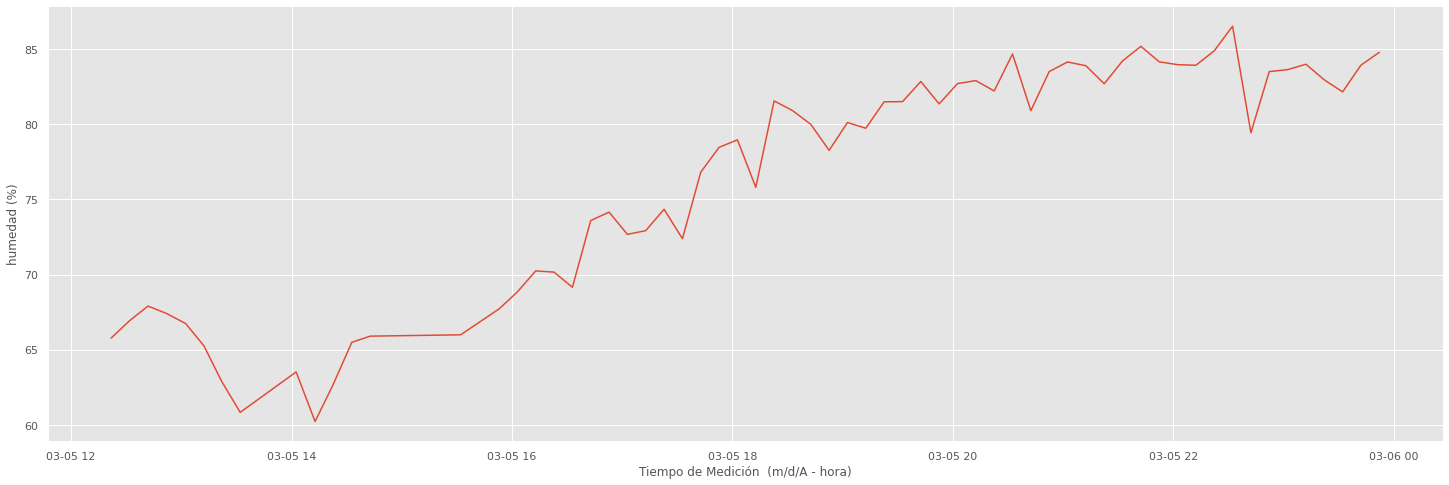

In [ ]:
plt.figure(figsize=(25, 8))
ax = sns.lineplot(
    x=df.columns[0],
    y=df.columns[1],
    data=df,
)

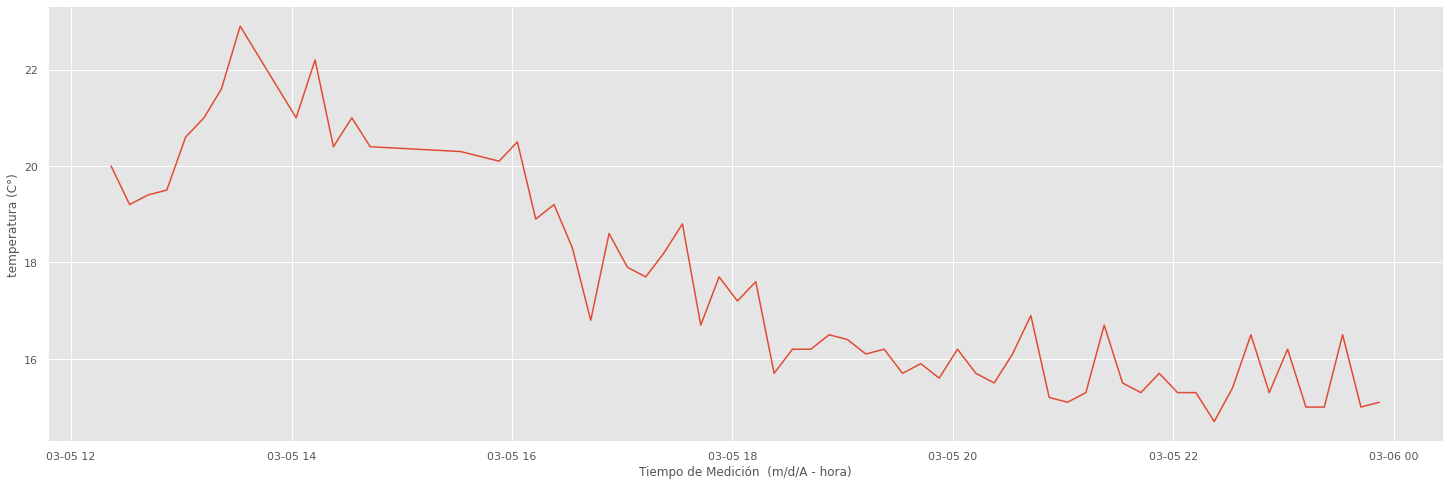

In [ ]:
plt.figure(figsize=(25, 8))
ax = sns.lineplot(
    x=df.columns[0],
    y=df.columns[2],
    data=df,
)

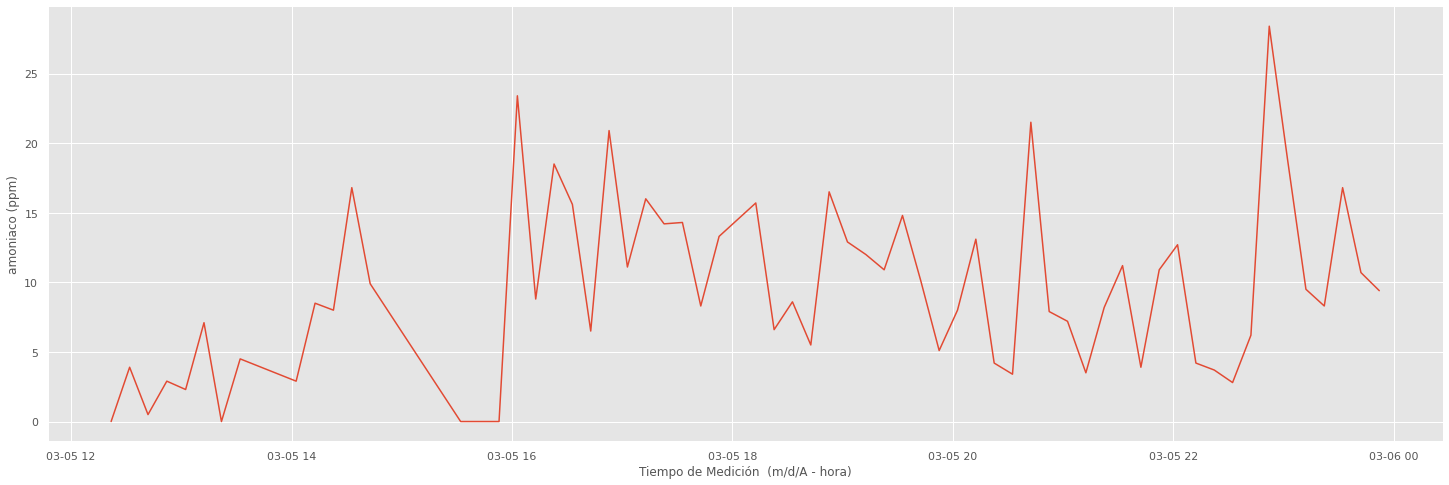

In [ ]:
plt.figure(figsize=(25, 8))
ax = sns.lineplot(
    x=df.columns[0],
    y=df.columns[3],
    data=df,
)

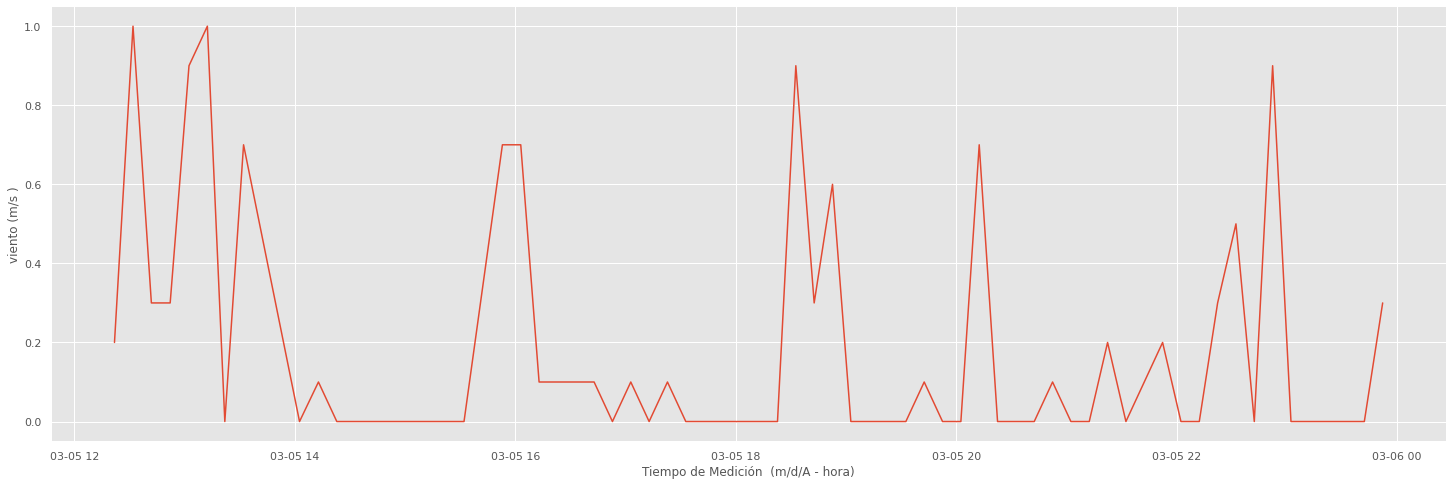

In [ ]:
plt.figure(figsize=(25, 8))
ax = sns.lineplot(
    x=df.columns[0],
    y=df.columns[4],
    data=df,
)

# Distribución de las variables: Conteo(y) vs variable(x):

- 'humedad (%)'
- 'temperatura (C°)'
- 'amoniaco (ppm)'
- 'viento (m/s )'

In [ ]:
df.shape

(63, 5)

Text(0.5, 1.0, 'humedad (%)')

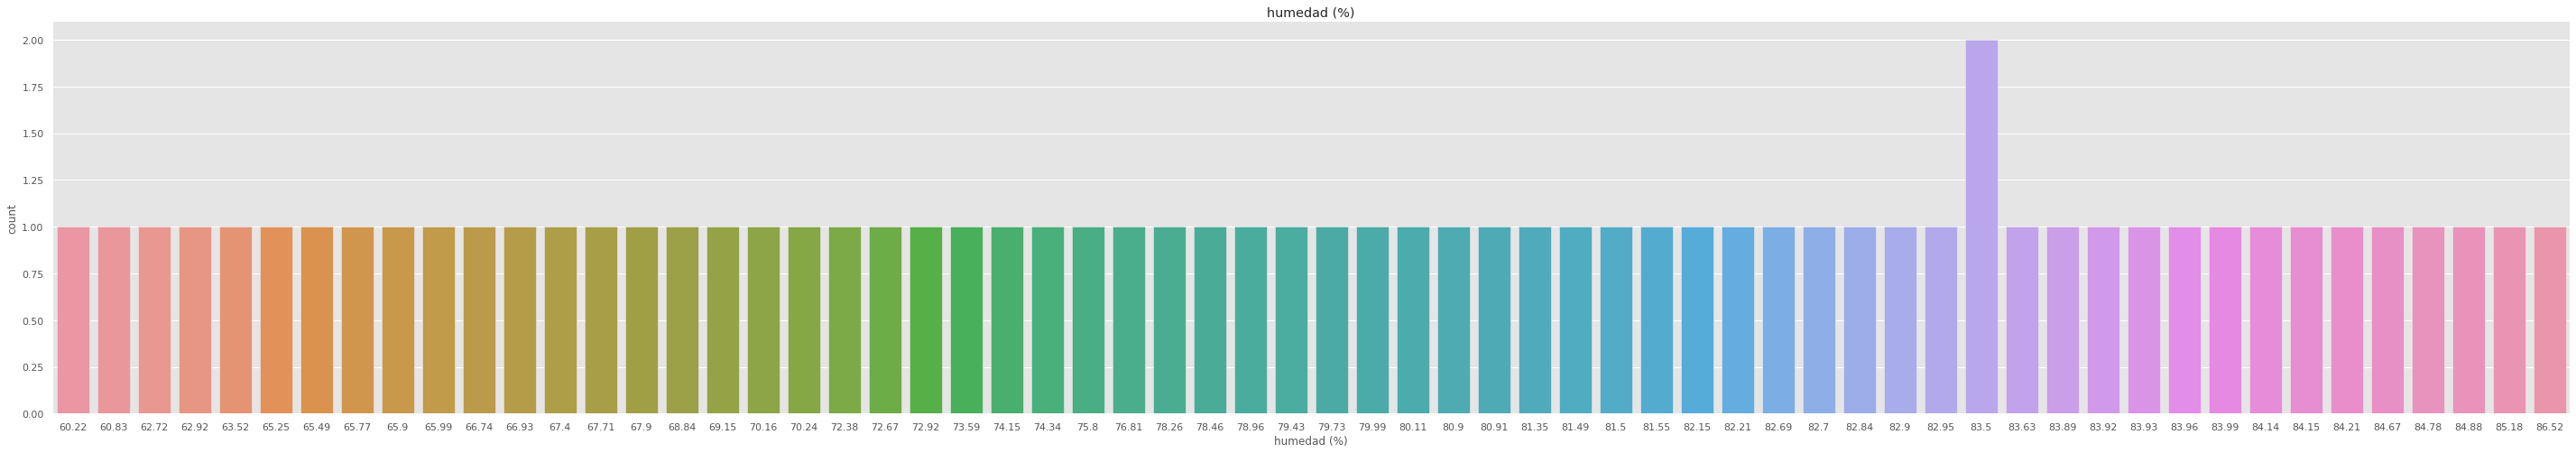

In [ ]:
plt.figure(figsize=(50, 8))
sns.countplot(x=df.columns[1], data = df)
plt.title('humedad (%)')

In [ ]:
tabla_frec_humedad=df.sort_values('humedad (%)')['humedad (%)'].value_counts().reset_index().sort_values('index')
tabla_frec_humedad

,index,humedad (%)
56,60.22,1
16,60.83,1
14,62.72,1
19,62.92,1
27,63.52,1
61,65.25,1
54,65.49,1
58,65.77,1
8,65.90,1
11,65.99,1


In [ ]:
tabla_frec_humedad.sum()# n=63 ; sum_x must be corrected as in the next line of code

index          4732.77
humedad (%)      63.00
dtype: float64

In [ ]:
(tabla_frec_humedad['index']*tabla_frec_humedad['humedad (%)']).sum() #sum_x=4816.27

4816.270000000001

In [ ]:
tabla_frec_acc_humedad=tabla_frec_humedad.copy()
tabla_frec_acc_humedad['frec_acc']=0 #frec_acc ES EL MISMO NOMBRE PARA TODAS PARA GENERALIZAR LOS DATAFRAMES
tabla_frec_acc_humedad_reset=tabla_frec_acc_humedad.reset_index()

frec_acc1=[]
frec_acc1.append(tabla_frec_acc_humedad_reset['humedad (%)'][0])

for i in range(1,len(tabla_frec_acc_humedad_reset)):
  frec_acc1.append(tabla_frec_acc_humedad_reset['humedad (%)'][i]+frec_acc1[i-1])

tabla_frec_acc_humedad_reset['frec_acc']=frec_acc1.copy() #frec_acc ES EL MISMO NOMBRE PARA TODAS PARA GENERALIZAR LOS DATAFRAMES
tabla_frec_acc_humedad_reset

,level_0,index,humedad (%),frec_acc
0,56,60.22,1,1
1,16,60.83,1,2
2,14,62.72,1,3
3,19,62.92,1,4
4,27,63.52,1,5
5,61,65.25,1,6
6,54,65.49,1,7
7,58,65.77,1,8
8,8,65.90,1,9
9,11,65.99,1,10


Text(0.5, 1.0, 'diagrama de caja de la humedad (%)')

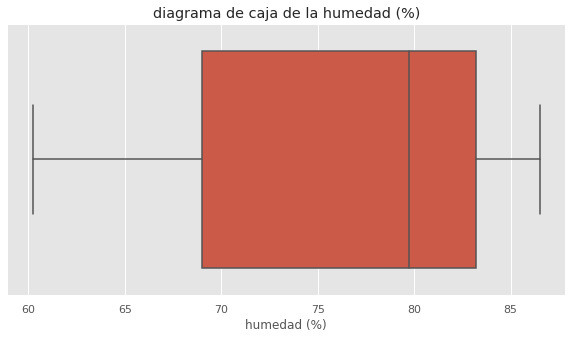

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df.columns[1], data = df)
plt.title('diagrama de caja de la humedad (%)')

Text(0.5, 1.0, 'diagrama de violin de la humedad (%)')

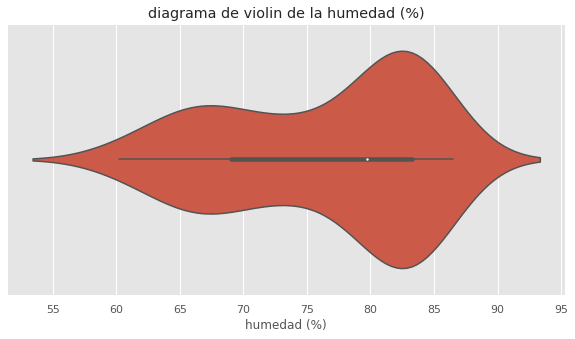

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df.columns[1], data = df)
plt.title('diagrama de violin de la humedad (%)')

Text(0.5, 1.0, 'temperatura (C°)')

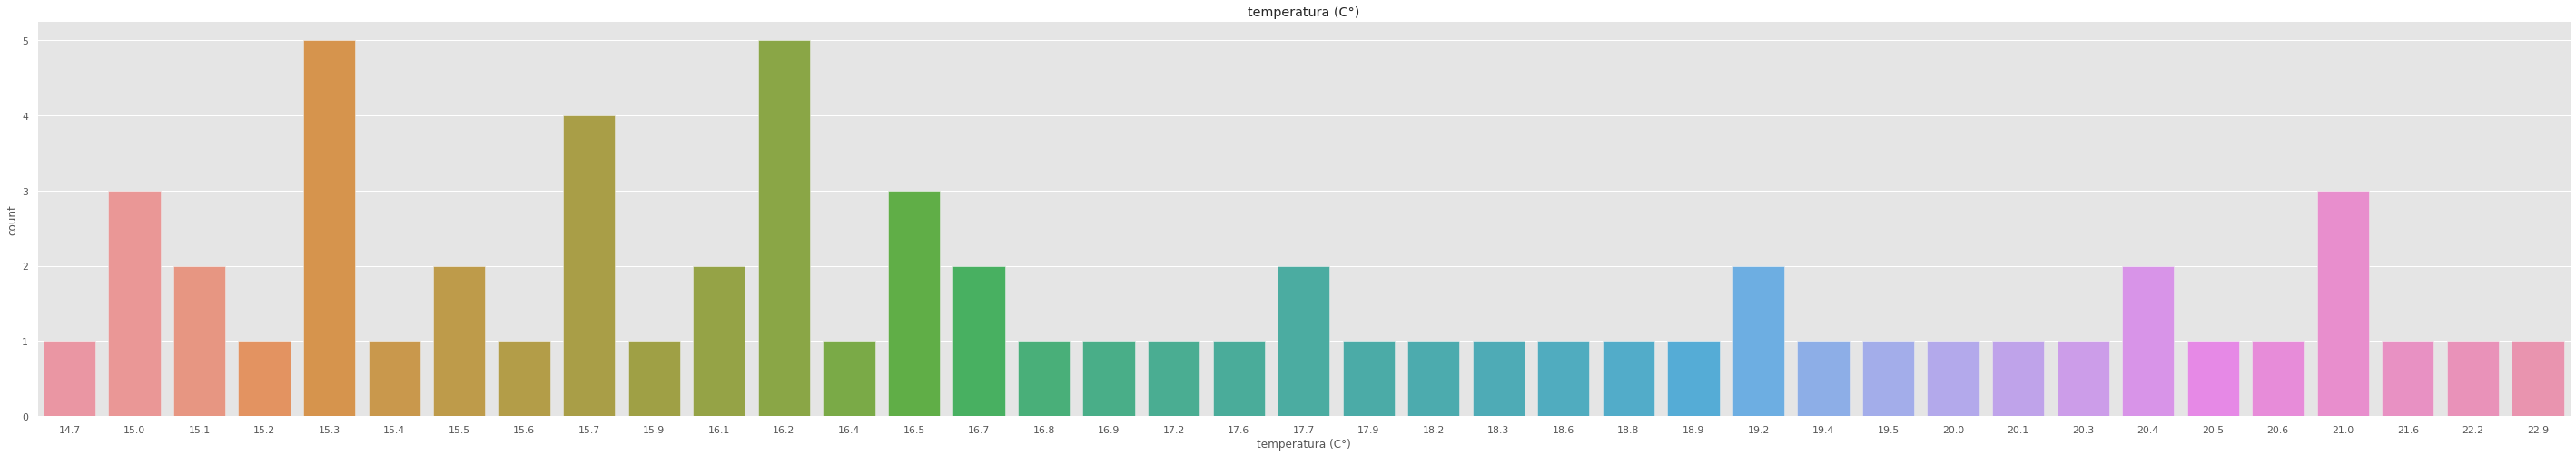

In [ ]:
plt.figure(figsize=(50, 8))
sns.countplot(x=df.columns[2], data = df)
plt.title('temperatura (C°)')

In [ ]:
tabla_frec_temperatura=df.sort_values('temperatura (C°)')['temperatura (C°)'].value_counts().reset_index().sort_values('index')
tabla_frec_temperatura

,index,temperatura (C°)
21,14.7,1
3,15.0,3
12,15.1,2
24,15.2,1
1,15.3,5
30,15.4,1
7,15.5,2
34,15.6,1
2,15.7,4
37,15.9,1


In [ ]:
tabla_frec_temperatura.sum()# n=63 ; sum_x must be corrected as in the next line of code

index               699.9
temperatura (C°)     63.0
dtype: float64

In [ ]:
(tabla_frec_temperatura['index']*tabla_frec_temperatura['temperatura (C°)']).sum() #sum_x=1098.7

1098.7

In [ ]:
tabla_frec_acc_temperatura=tabla_frec_temperatura.copy()
tabla_frec_acc_temperatura['frec_acc']=0 #frec_acc ES EL MISMO NOMBRE PARA TODAS PARA GENERALIZAR LOS DATAFRAMES
tabla_frec_acc_temperatura_reset=tabla_frec_acc_temperatura.reset_index()

frec_acc2=[]
frec_acc2.append(tabla_frec_acc_temperatura_reset['temperatura (C°)'][0])

for i in range(1,len(tabla_frec_acc_temperatura_reset)):
  frec_acc2.append(tabla_frec_acc_temperatura_reset['temperatura (C°)'][i]+frec_acc2[i-1])

tabla_frec_acc_temperatura_reset['frec_acc']=frec_acc2.copy() #frec_acc ES EL MISMO NOMBRE PARA TODAS PARA GENERALIZAR LOS DATAFRAMES
tabla_frec_acc_temperatura_reset

,level_0,index,temperatura (C°),frec_acc
0,21,14.7,1,1
1,3,15.0,3,4
2,12,15.1,2,6
3,24,15.2,1,7
4,1,15.3,5,12
5,30,15.4,1,13
6,7,15.5,2,15
7,34,15.6,1,16
8,2,15.7,4,20
9,37,15.9,1,21


Text(0.5, 1.0, 'diagrama de caja de la temperatura (C°)')

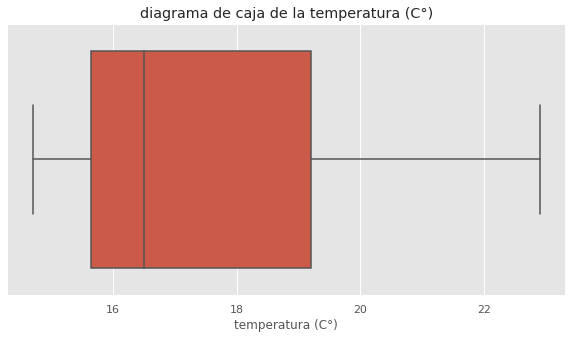

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df.columns[2], data = df)
plt.title('diagrama de caja de la temperatura (C°)')

Text(0.5, 1.0, 'diagrama de violin de la temperatura (C°)')

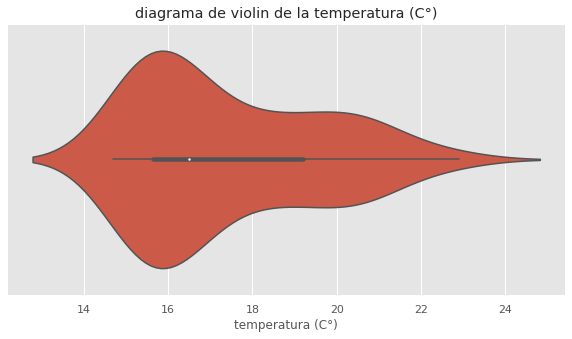

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df.columns[2], data = df)
plt.title('diagrama de violin de la temperatura (C°)')

Text(0.5, 1.0, 'amoniaco (ppm)')

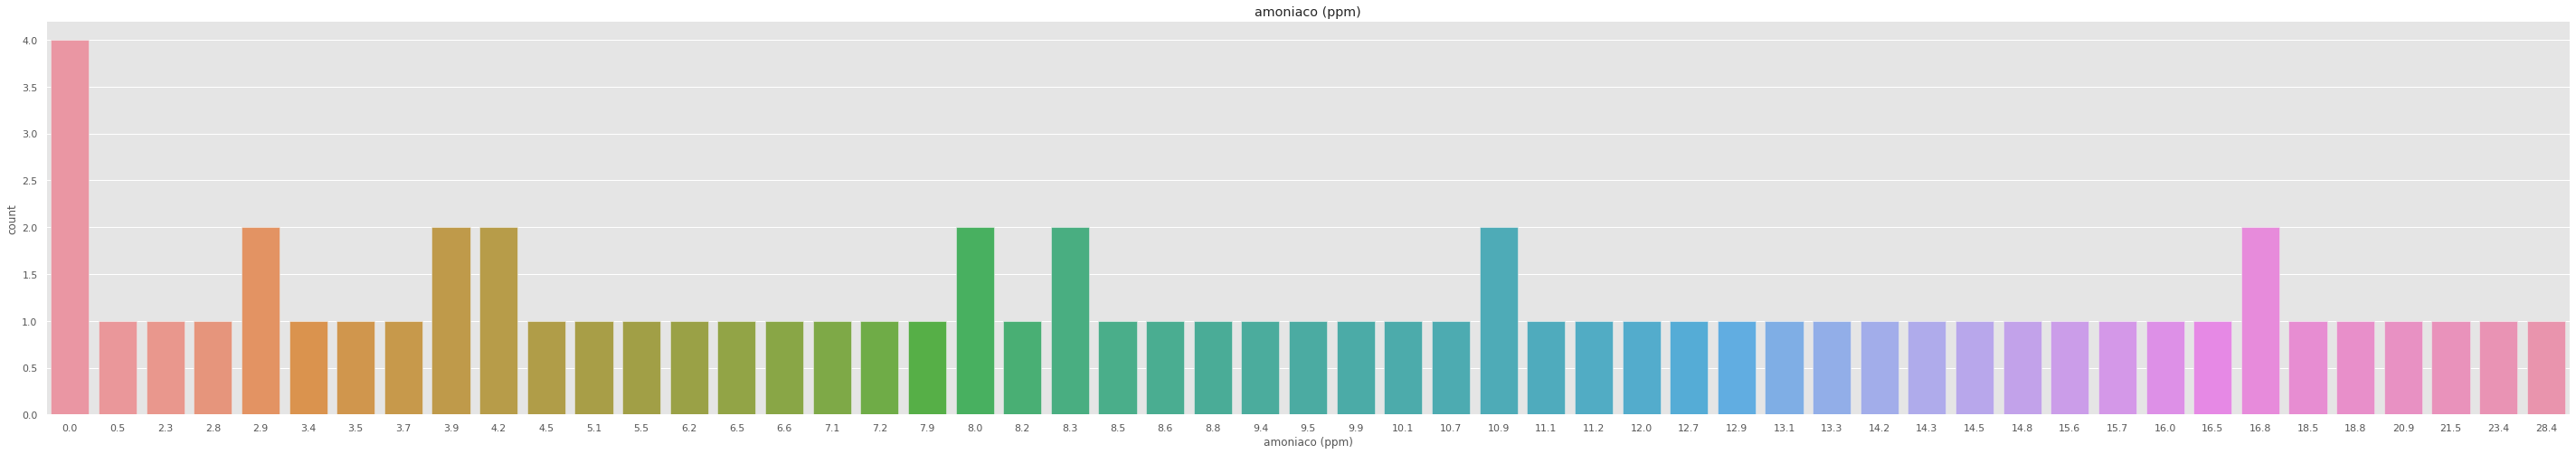

In [ ]:
plt.figure(figsize=(50, 8))
sns.countplot(x=df.columns[3], data = df)
plt.title('amoniaco (ppm)')

In [ ]:
tabla_frec_amoniaco=df.sort_values('amoniaco (ppm)')['amoniaco (ppm)'].value_counts().reset_index().sort_values('index') # tabla de frecuencia
tabla_frec_amoniaco

,index,amoniaco (ppm)
0,0.0,4
11,0.5,1
47,2.3,1
46,2.8,1
2,2.9,2
10,3.4,1
14,3.5,1
34,3.7,1
6,3.9,2
7,4.2,2


In [ ]:
tabla_frec_amoniaco.sum() # n=63 ; sum_x must be corrected as in the next line of code

index             550.9
amoniaco (ppm)     63.0
dtype: float64

In [ ]:
(tabla_frec_amoniaco['index']*tabla_frec_amoniaco['amoniaco (ppm)']).sum() #sum_x=605.9

605.8999999999999

In [ ]:
tabla_frec_acc_amoniaco=tabla_frec_amoniaco.copy()
tabla_frec_acc_amoniaco['frec_acc']=0 #frec_acc ES EL MISMO NOMBRE PARA TODAS PARA GENERALIZAR LOS DATAFRAMES
tabla_frec_acc_amoniaco_reset=tabla_frec_acc_amoniaco.reset_index()

frec_acc3=[]
frec_acc3.append(tabla_frec_acc_amoniaco_reset['amoniaco (ppm)'][0])

for i in range(1,len(tabla_frec_acc_amoniaco_reset)):
  frec_acc3.append(tabla_frec_acc_amoniaco_reset['amoniaco (ppm)'][i]+frec_acc3[i-1])

tabla_frec_acc_amoniaco_reset['frec_acc']=frec_acc3.copy() #frec_acc ES EL MISMO NOMBRE PARA TODAS PARA GENERALIZAR LOS DATAFRAMES
tabla_frec_acc_amoniaco_reset

,level_0,index,amoniaco (ppm),frec_acc
0,0,0.0,4,4
1,11,0.5,1,5
2,47,2.3,1,6
3,46,2.8,1,7
4,2,2.9,2,9
5,10,3.4,1,10
6,14,3.5,1,11
7,34,3.7,1,12
8,6,3.9,2,14
9,7,4.2,2,16


Text(0.5, 1.0, 'diagrama de caja del amoniaco (ppm)')

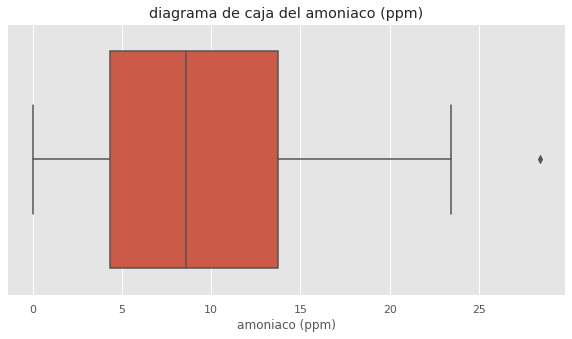

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df.columns[3], data = df)
plt.title('diagrama de caja del amoniaco (ppm)')

Text(0.5, 1.0, 'diagrama de violin del amoniaco (ppm)')

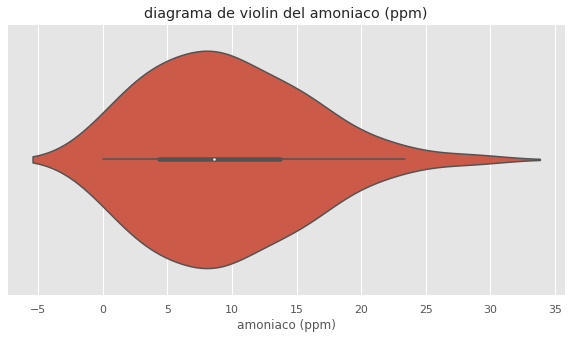

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df.columns[3], data = df)
plt.title('diagrama de violin del amoniaco (ppm)')

Text(0.5, 1.0, 'viento (m/s )')

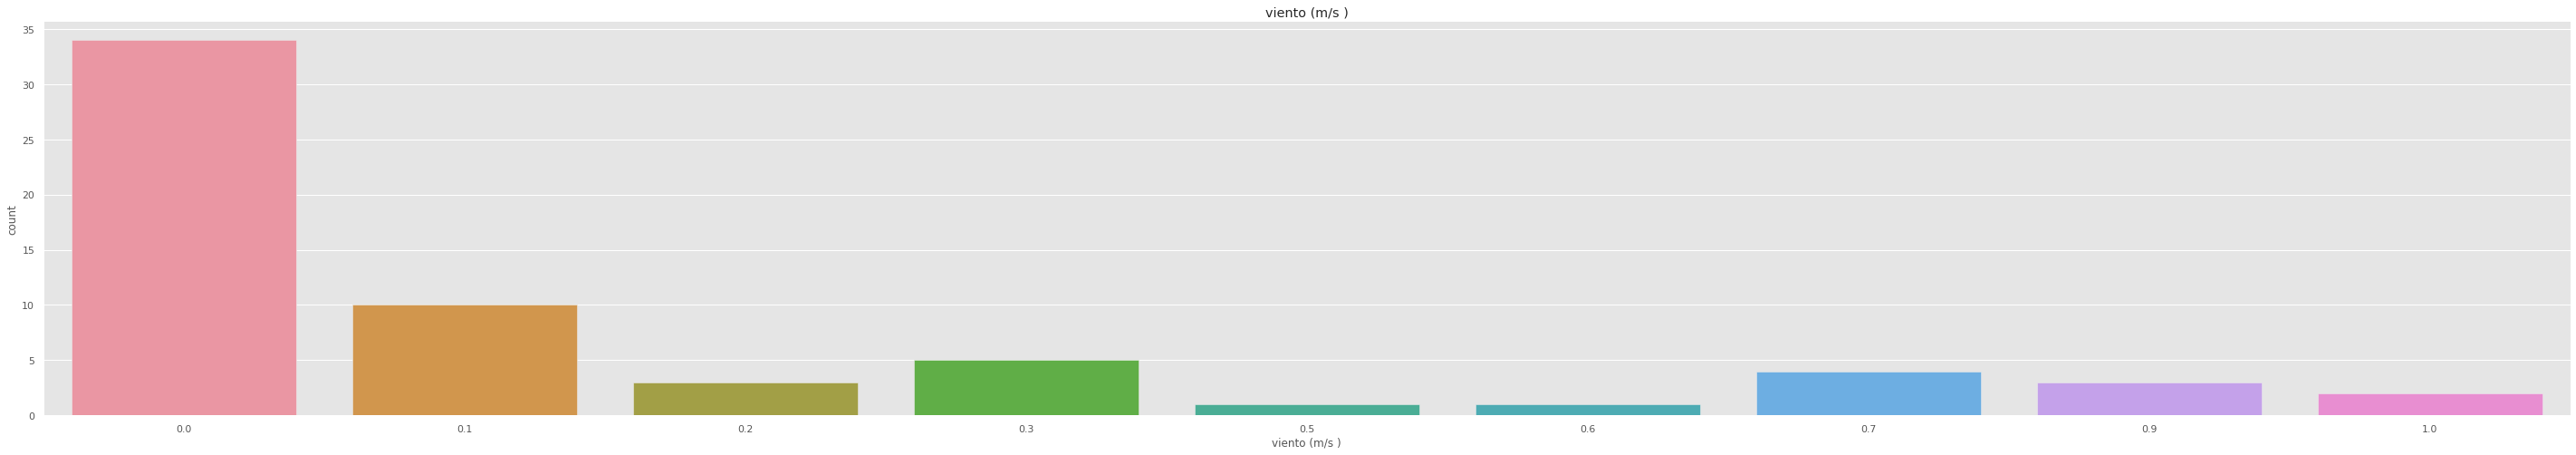

In [ ]:
plt.figure(figsize=(50, 8))
sns.countplot(x=df.columns[4], data = df)
plt.title('viento (m/s )')

In [ ]:
tabla_frec_viento=df.sort_values('viento (m/s )')['viento (m/s )'].value_counts().reset_index().sort_values('index') # tabla de frecuencia
tabla_frec_viento

,index,viento (m/s )
0,0.0,34
1,0.1,10
4,0.2,3
2,0.3,5
8,0.5,1
7,0.6,1
3,0.7,4
5,0.9,3
6,1.0,2


In [ ]:
tabla_frec_viento.sum() # n=63 ; sum_x must be corrected as in the next line of code

index             4.3
viento (m/s )    63.0
dtype: float64

In [ ]:
(tabla_frec_viento['index']*tabla_frec_viento['viento (m/s )']).sum() #sum_x=11.7

11.7

In [ ]:
tabla_frec_acc_viento=tabla_frec_viento.copy()
tabla_frec_acc_viento['frec_acc']=0 #frec_acc ES EL MISMO NOMBRE PARA TODAS PARA GENERALIZAR LOS DATAFRAMES
tabla_frec_acc_viento_reset=tabla_frec_acc_viento.reset_index()

frec_acc4=[]
frec_acc4.append(tabla_frec_acc_viento_reset['viento (m/s )'][0])

for i in range(1,len(tabla_frec_acc_viento_reset)):
  frec_acc4.append(tabla_frec_acc_viento_reset['viento (m/s )'][i]+frec_acc4[i-1])

tabla_frec_acc_viento_reset['frec_acc']=frec_acc4.copy() #frec_acc ES EL MISMO NOMBRE PARA TODAS PARA GENERALIZAR LOS DATAFRAMES
tabla_frec_acc_viento_reset


,level_0,index,viento (m/s ),frec_acc
0,0,0.0,34,34
1,1,0.1,10,44
2,4,0.2,3,47
3,2,0.3,5,52
4,8,0.5,1,53
5,7,0.6,1,54
6,3,0.7,4,58
7,5,0.9,3,61
8,6,1.0,2,63


In [ ]:
#PERCENTILES(%): esta función para el caso del viento(cuarta variable) (cuyos resultados si se ecuentran en los datos) hace algo similar a lo que hace la función definida en python como quantile() que arroja resultados exactos (cuyos valores no necesariamente se encuentran en los datos)

def percentil4(porcentaje):#porcentaje en valor decimal (si es 50%, se pasa solo 50/100=0.5), igual que la función quantile()
  div=n/100
  for fila in range(len(tabla_frec_acc_viento_reset)):
    if (tabla_frec_acc_viento_reset['frec_acc'][fila]>=porcentaje*100*div):
      return tabla_frec_acc_viento_reset['index'][fila]

In [ ]:
print(percentil4(0.25),percentil4(0.50),percentil4(0.75)) # solo para el caso del viento

0.0 0.0 0.3


In [ ]:
#GENERALIZANDO LA FUNCIÓN ANTERIOR PARA LAS CUATRO TABLAS de FREC ACC YA CONSTRUIDAS:

def percentil(tabla_frec_acc,porcentaje):#porcentaje en valor decimal (si es 50%, se pasa solo 50/100=0.5), igual que la función quantile()
  div=n/100
  for fila in range(len(tabla_frec_acc)):
    if (tabla_frec_acc['frec_acc'][fila]>=porcentaje*100*div):
      return tabla_frec_acc['index'][fila]

In [ ]:
tablas_frec_acc=[tabla_frec_acc_humedad_reset, tabla_frec_acc_temperatura_reset,tabla_frec_acc_amoniaco_reset,tabla_frec_acc_viento_reset] #lista de dataframes

In [ ]:
percentil(tabla_frec_acc_viento_reset,0.75)

0.3

In [ ]:
percentil4(0.75)

0.3

In [ ]:
percentil4(0.88) #cualquier otro porcentaje

0.7

In [ ]:
df.quantile(0.88)

humedad (%)         84.074
temperatura (C°)    20.456
amoniaco (ppm)      16.668
viento (m/s )        0.700
Name: 0.88, dtype: float64

In [ ]:
[percentil(elem,0.75) for elem in tablas_frec_acc]

[83.5, 19.2, 14.2, 0.3]

In [ ]:
[[percentil(elem1,elem2) for elem1 in tablas_frec_acc] for elem2 in [0.25,0.50,0.75]] # lista de listas (aquí se arrojan tres listas, 1 por cada percentil, y dentro ce cada lista las cuatro variables)

[[68.84, 15.6, 4.2, 0.0], [79.73, 16.5, 8.6, 0.0], [83.5, 19.2, 14.2, 0.3]]

In [ ]:
[[percentil(elem1,elem2) for elem2 in [.25,.5,.75]] for elem1 in tablas_frec_acc] #.5=0.5=0.50, lista de listas (aquí se arrojan cuatro listas, 1 por cada variable, y dentro ce cada lista los tres percentiles)

[[68.84, 79.73, 83.5], [15.6, 16.5, 19.2], [4.2, 8.6, 14.2], [0.0, 0.0, 0.3]]

In [ ]:
#AQUI COMPROBAMOS QUE LO ANTERIOR ESTÁ CORRECTO
df.quantile([0.25, 0.50, 0.75], axis=0)

,humedad (%),temperatura (C°),amoniaco (ppm),viento (m/s )
0.25,68.995,15.65,4.35,0.00
0.50,79.730,16.50,8.60,0.00
0.75,83.225,19.20,13.75,0.25


In [ ]:
df.describe()

,humedad (%),temperatura (C°),amoniaco (ppm),viento (m/s )
count,63.000000,63.000000,63.000000,63.000000
mean,76.448730,17.439683,9.617460,0.185714
std,7.785087,2.193946,6.214877,0.297764
min,60.220000,14.700000,0.000000,0.000000
25%,68.995000,15.650000,4.350000,0.000000
50%,79.730000,16.500000,8.600000,0.000000
75%,83.225000,19.200000,13.750000,0.250000
max,86.520000,22.900000,28.400000,1.000000


Text(0.5, 1.0, 'diagrama de caja del viento (m/s )')

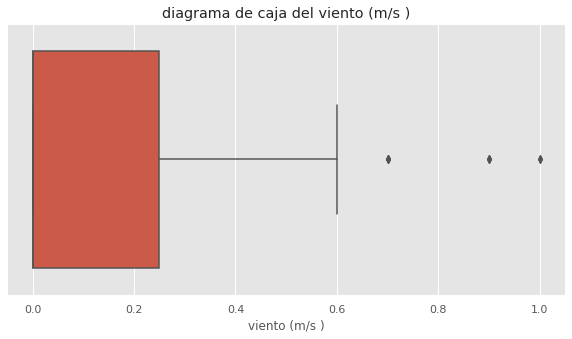

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df.columns[4], data = df)
plt.title('diagrama de caja del viento (m/s )')

Text(0.5, 1.0, 'diagrama de violin del viento (m/s )')

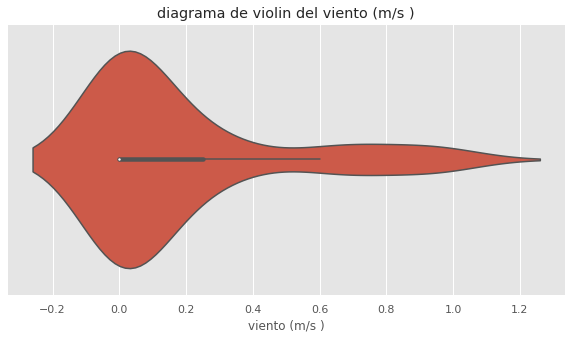

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df.columns[4], data = df)
plt.title('diagrama de violin del viento (m/s )')

# Ahora la relación entre amoniaco(y) y viento(x): y=f(x)

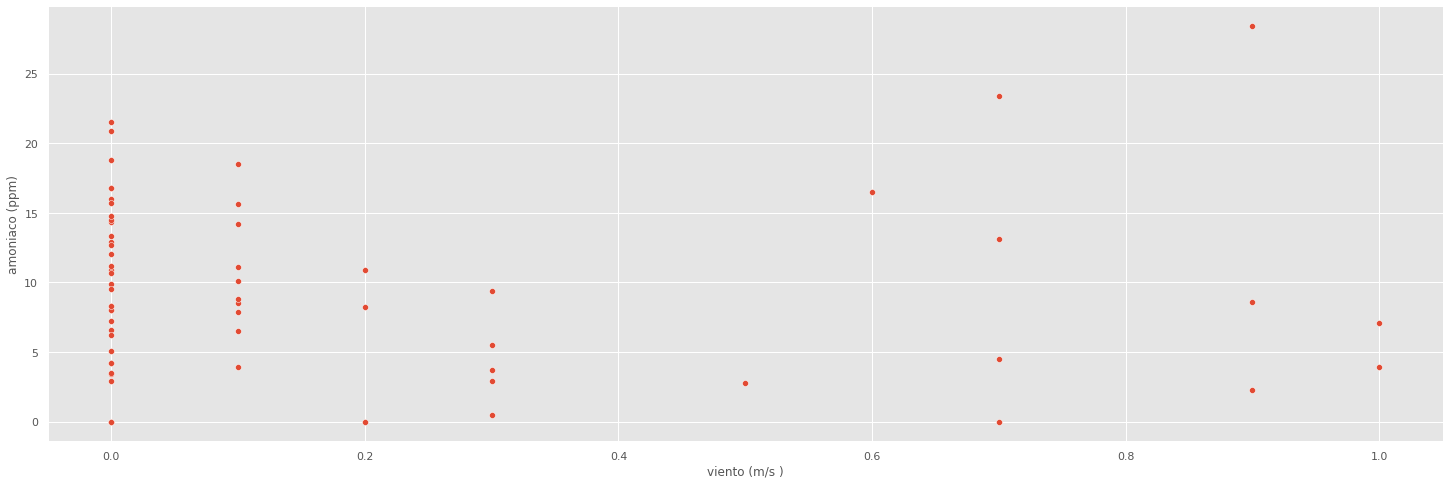

In [ ]:
plt.figure(figsize=(25, 8))
ax = sns.scatterplot(
    x=df.columns[4],
    y=df.columns[3],
    data=df,
)

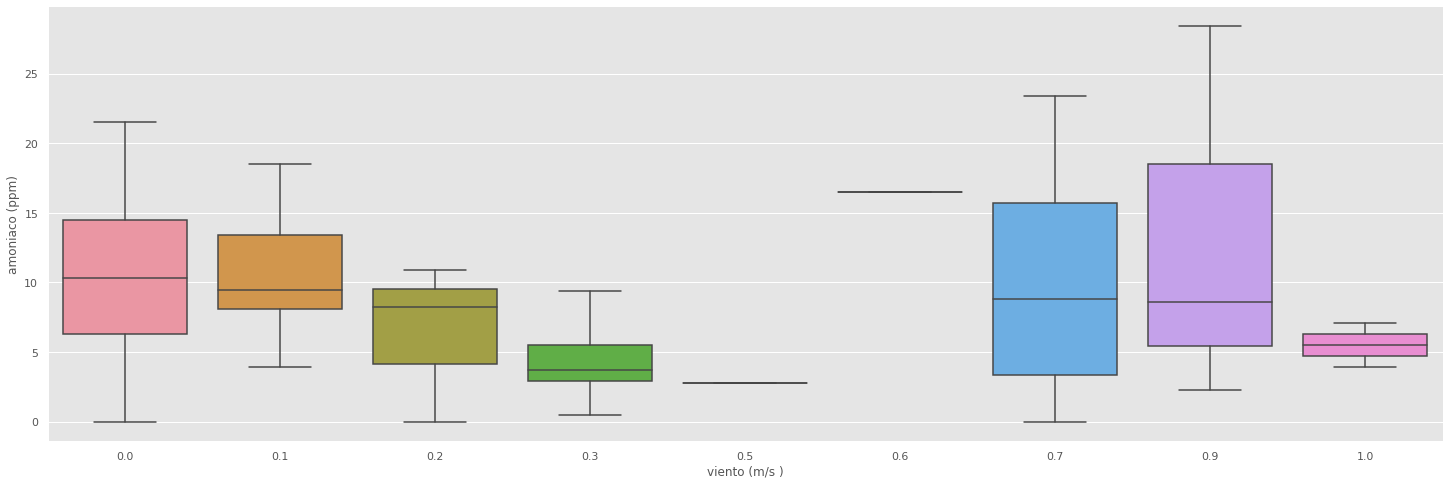

In [ ]:
plt.figure(figsize=(25, 8))
ax = sns.boxplot(
    x=df.columns[4],
    y=df.columns[3],
    data=df,
)

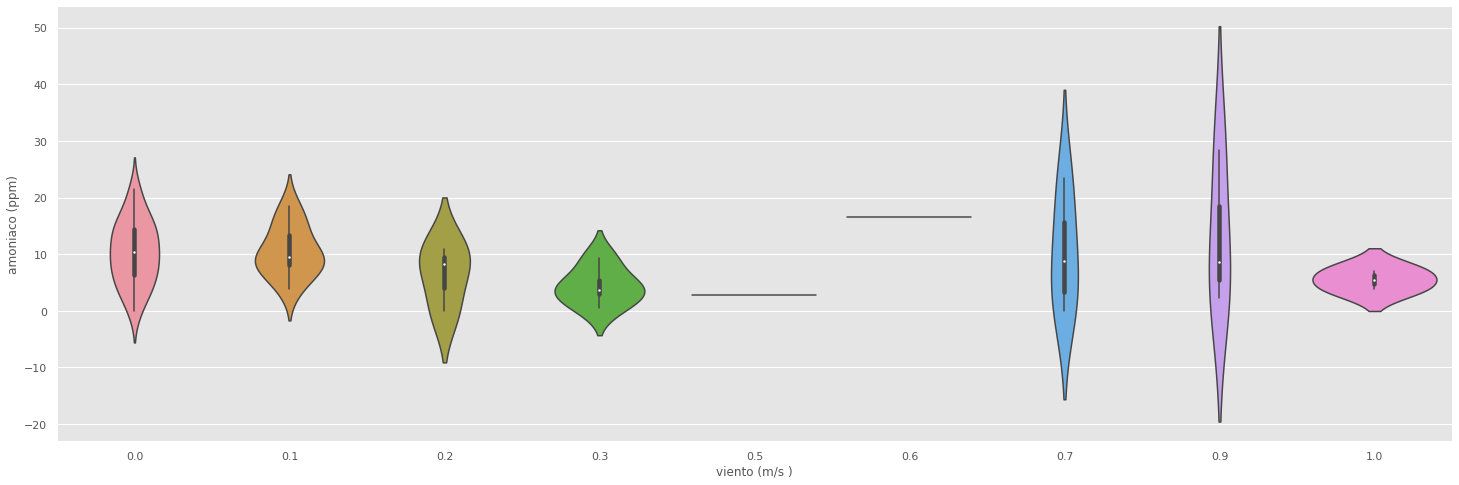

In [ ]:
plt.figure(figsize=(25, 8))
ax = sns.violinplot(
    x=df.columns[4],
    y=df.columns[3],
    data=df,
)

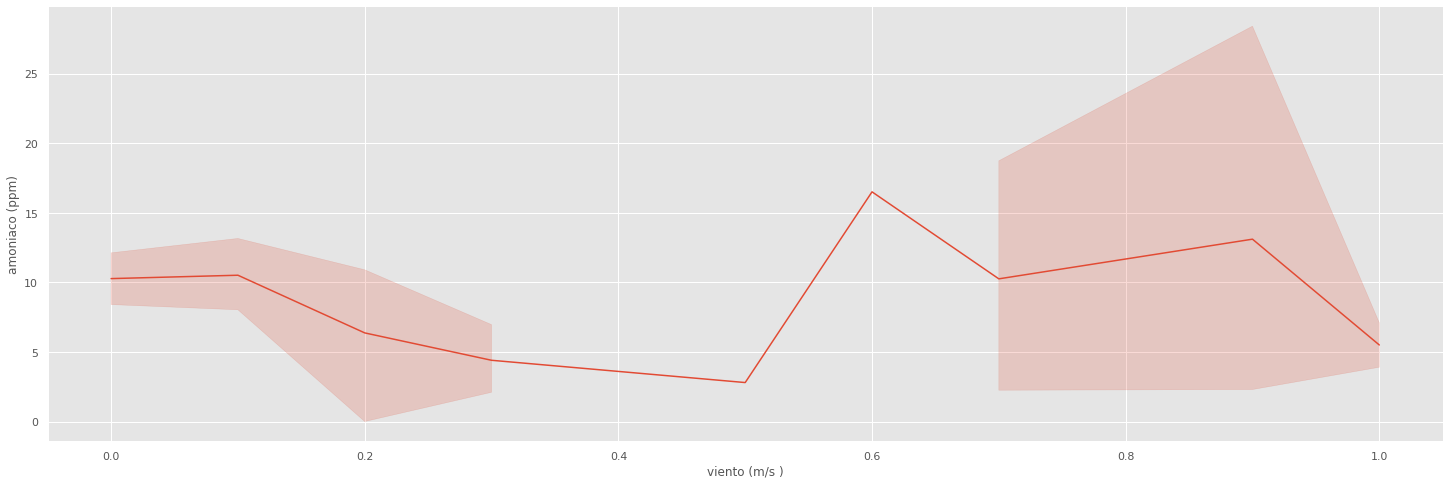

In [ ]:
plt.figure(figsize=(25, 8))
ax = sns.lineplot(
    x=df.columns[4],
    y=df.columns[3],
    data=df,
)

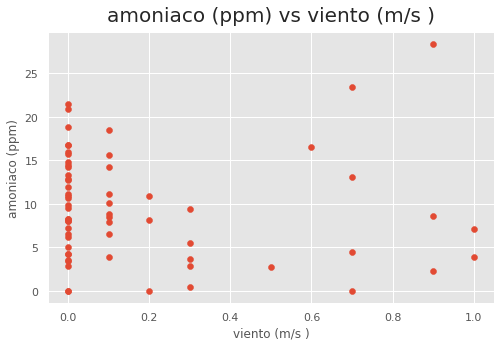

In [ ]:
plt.scatter(df['viento (m/s )'],df['amoniaco (ppm)'])
plt.title("amoniaco (ppm) vs viento (m/s )", fontsize=20, verticalalignment='bottom');
plt.xlabel("viento (m/s )");
plt.ylabel("amoniaco (ppm)");

Text(10.175000000000004, 0.5, 'amoniaco (ppm)')

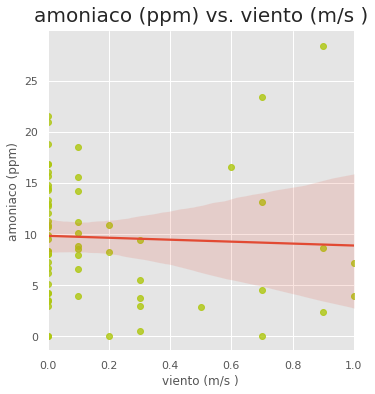

In [ ]:
sns.lmplot(x = 'viento (m/s )', y = 'amoniaco (ppm)', data = df, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("amoniaco (ppm) vs. viento (m/s )", fontsize=20, verticalalignment='bottom')
plt.xlabel("viento (m/s )")
plt.ylabel("amoniaco (ppm)")

# Regresión Lineal Simple: y=mx+b +error (m=pendiente, b=intercepto)

In [ ]:
### Cargando los paquetes relevantes
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
#import chart_studio.plotly     as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

%matplotlib inline
plt.style.use('ggplot')

In [ ]:
df.columns

Index(['Tiempo de Medición  (m/d/A - hora)', 'humedad (%)', 'temperatura (C°)',
       'amoniaco (ppm)', 'viento (m/s )'],
      dtype='object')

# Renombrando las columnas

In [ ]:
df2=df.rename(columns={'Tiempo de Medición  (m/d/A - hora)':'tiempo_medicion_timestamp', 'humedad (%)':'humedad_percent', 'temperatura (C°)':'temperatura_celsius','amoniaco (ppm)':'amoniaco_ppm', 'viento (m/s )':'viento_mt_per_sec'})
df2.columns

Index(['tiempo_medicion_timestamp', 'humedad_percent', 'temperatura_celsius',
       'amoniaco_ppm', 'viento_mt_per_sec'],
      dtype='object')

In [ ]:
df2

,tiempo_medicion_timestamp,humedad_percent,temperatura_celsius,amoniaco_ppm,viento_mt_per_sec
0,2014-03-05 12:21:47,65.77,20.0,0.0,0.2
1,2014-03-05 12:31:52,66.93,19.2,3.9,1.0
2,2014-03-05 12:41:52,67.90,19.4,0.5,0.3
3,2014-03-05 12:52:06,67.40,19.5,2.9,0.3
4,2014-03-05 13:02:21,66.74,20.6,2.3,0.9
5,2014-03-05 13:12:21,65.25,21.0,7.1,1.0
6,2014-03-05 13:21:51,62.92,21.6,0.0,0.0
7,2014-03-05 13:32:03,60.83,22.9,4.5,0.7
8,2014-03-05 14:02:31,63.52,21.0,2.9,0.0
9,2014-03-05 14:12:49,60.22,22.2,8.5,0.1


In [ ]:
sum_x=df2['viento_mt_per_sec'].sum() #sum_x
sum_x

11.700000000000001

In [ ]:
sum_y=df2['amoniaco_ppm'].sum() #sum_y
sum_y

605.8999999999999

In [ ]:
sum_xy=(df2['viento_mt_per_sec']*df2['amoniaco_ppm']).sum() #sum_xy
sum_xy

107.29999999999998

In [ ]:
sum([df2['viento_mt_per_sec'][i]*df2['amoniaco_ppm'][i] for i in range(63)]) # usando una lista comprimida da el mismo resultado de sum_xy

107.30000000000001

In [ ]:
sum_x2=(df2['viento_mt_per_sec']**2).sum() #sum_x^2
sum_x2

7.67

In [ ]:
#ya conociamos n=len(df)=63
def calculo_regresion_lineal_simple(n,sum_x,sum_y,sum_xy,sum_x2): # y_estimada = pendiente*x + intercepto = m*x + b
  m=(n*sum_xy-sum_x*sum_y)/(n*sum_x2-(sum_x)**2)
  b= (sum_y-m*sum_x)/n
  return m, b

In [ ]:
(pendiente, intercepto) = calculo_regresion_lineal_simple(n,sum_x,sum_y,sum_xy,sum_x2)
print('pendiente= ',pendiente) # debe ser igual al valor de viento_mt_per_sec como se muestra justo en el siguiente resultado de la celda
print('intercepto= ',intercepto) # debe ser igual al valor de Intercept como se muestra justo en el siguiente resultado de la celda
print(f'La ecuación lineal estimada es: y_estimada = m * x + b = {pendiente} * x + {intercepto}')

pendiente=  -0.9503638253638258
intercepto=  9.793956456456455
La ecuación lineal estimada es: y_estimada = m * x + b = -0.9503638253638258 * x + 9.793956456456455


In [ ]:
def calculo_y_estimada(x):
  (m,b)=calculo_regresion_lineal_simple(n,sum_x,sum_y,sum_xy,sum_x2)
  y_estimada=m*x+b
  return y_estimada

In [ ]:
y_estimada=calculo_y_estimada(0.2)
y_estimada

9.60388369138369

In [ ]:
#Definición del modelo
modelo1 = 'amoniaco_ppm~viento_mt_per_sec'

#Entrenamiento del modelo con la librería 'statsmodels'
lm1   = sm.ols(formula = modelo1, data = df2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           amoniaco_ppm   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.1267
Date:                Wed, 14 Apr 2021   Prob (F-statistic):              0.723
Time:                        01:43:04   Log-Likelihood:                -203.92
No. Observations:                  63   AIC:                             411.8
Df Residuals:                      61   BIC:                             416.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.7940      0.93

De acuerdo a lo anterior, obtenemos m y b:

In [ ]:
m=-0.9504 # pendiente asociada a la var independiente (x=viento)
b=9.7940  # intercepto (punto de corte con el eje y(amoniaco) cuando x(viento)=0)

Text(10.175000000000004, 0.5, 'amoniaco_ppm')

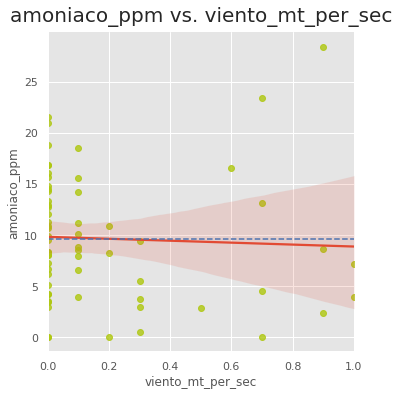

In [ ]:
sns.lmplot(x = 'viento_mt_per_sec', y = 'amoniaco_ppm', data = df2, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("amoniaco_ppm vs. viento_mt_per_sec", fontsize=20, verticalalignment='bottom')
plt.axhline(df2['amoniaco_ppm'].mean(), ls='--',color = 'b')
plt.xlabel("viento_mt_per_sec")
plt.ylabel("amoniaco_ppm")

In [ ]:
df2['viento_mt_per_sec'].head(3)

0    0.2
1    1.0
2    0.3
Name: viento_mt_per_sec, dtype: float64

In [ ]:
#comparemos las predicciones del modelo de python con las de mi modelo (ver siguiente celda):
calculo_y_estimada(df2['viento_mt_per_sec'])

0     9.603884
1     8.843593
2     9.508847
3     9.508847
4     8.938629
5     8.843593
6     9.793956
7     9.128702
8     9.793956
9     9.698920
10    9.793956
11    9.793956
12    9.793956
13    9.793956
14    9.128702
15    9.128702
16    9.698920
17    9.698920
18    9.698920
19    9.698920
20    9.793956
21    9.698920
22    9.793956
23    9.698920
24    9.793956
25    9.793956
26    9.793956
27    9.793956
28    9.793956
29    9.793956
30    8.938629
31    9.508847
32    9.223738
33    9.793956
34    9.793956
35    9.793956
36    9.793956
37    9.698920
38    9.793956
39    9.793956
40    9.128702
41    9.793956
42    9.793956
43    9.793956
44    9.698920
45    9.793956
46    9.793956
47    9.603884
48    9.793956
49    9.698920
50    9.603884
51    9.793956
52    9.793956
53    9.508847
54    9.318775
55    9.793956
56    8.938629
57    9.793956
58    9.793956
59    9.793956
60    9.793956
61    9.793956
62    9.508847
Name: viento_mt_per_sec, dtype: float64

In [ ]:
#comparemos las predicciones del modelo de python con las de mi modelo (ver siguiente celda):
y_estimada=[calculo_y_estimada(xi) for xi in df2['viento_mt_per_sec']]
y_estimada

[9.60388369138369,
 8.843592631092628,
 9.508847308847306,
 9.508847308847306,
 8.938629013629011,
 8.843592631092628,
 9.793956456456455,
 9.128701778701776,
 9.793956456456455,
 9.698920073920071,
 9.793956456456455,
 9.793956456456455,
 9.793956456456455,
 9.793956456456455,
 9.128701778701776,
 9.128701778701776,
 9.698920073920071,
 9.698920073920071,
 9.698920073920071,
 9.698920073920071,
 9.793956456456455,
 9.698920073920071,
 9.793956456456455,
 9.698920073920071,
 9.793956456456455,
 9.793956456456455,
 9.793956456456455,
 9.793956456456455,
 9.793956456456455,
 9.793956456456455,
 8.938629013629011,
 9.508847308847306,
 9.22373816123816,
 9.793956456456455,
 9.793956456456455,
 9.793956456456455,
 9.793956456456455,
 9.698920073920071,
 9.793956456456455,
 9.793956456456455,
 9.128701778701776,
 9.793956456456455,
 9.793956456456455,
 9.793956456456455,
 9.698920073920071,
 9.793956456456455,
 9.793956456456455,
 9.60388369138369,
 9.793956456456455,
 9.698920073920071,
 9.

In [ ]:
y_estimada=lm1.predict()
y_estimada

array([9.60388369, 8.84359263, 9.50884731, 9.50884731, 8.93862901,
       8.84359263, 9.79395646, 9.12870178, 9.79395646, 9.69892007,
       9.79395646, 9.79395646, 9.79395646, 9.79395646, 9.12870178,
       9.12870178, 9.69892007, 9.69892007, 9.69892007, 9.69892007,
       9.79395646, 9.69892007, 9.79395646, 9.69892007, 9.79395646,
       9.79395646, 9.79395646, 9.79395646, 9.79395646, 9.79395646,
       8.93862901, 9.50884731, 9.22373816, 9.79395646, 9.79395646,
       9.79395646, 9.79395646, 9.69892007, 9.79395646, 9.79395646,
       9.12870178, 9.79395646, 9.79395646, 9.79395646, 9.69892007,
       9.79395646, 9.79395646, 9.60388369, 9.79395646, 9.69892007,
       9.60388369, 9.79395646, 9.79395646, 9.50884731, 9.31877454,
       9.79395646, 8.93862901, 9.79395646, 9.79395646, 9.79395646,
       9.79395646, 9.79395646, 9.50884731])

# Grafica de la recta de regresión:

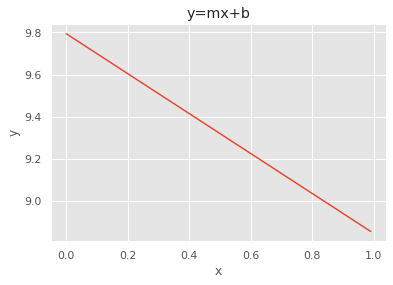

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,1,0.01)
y = m*x + b

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=mx+b')
plt.show()

# Error estándar (Se) de y_estimada (Ye), Coeficiente de Determinación (r^2) y Coeficiente de Correlación Lineal (r=raiz_cuadrada(r^2)):

- Si r^2 --> 1, modelo "perfecto" (confiable)
- Si r^2 --> 0.5, modelo "regular" (confiable al 50%)
- Si r^2 --> 0, modelo "imperfecto" (no confiable)

- Si r --> 1, hay correlación positiva. x,y tienen una relacion directa: m es positiva
-Si r--> 0, la correlación entre x, y tiende a 0 (se aproxima a que no hay relación, y sería una linea horizontal de pendiente aproximadamente cero)
- Si r --> -1, hay correlación negativa. x,y tienen una relacion inversa: m es negativa

In [ ]:
df2.head(3)

,tiempo_medicion_timestamp,humedad_percent,temperatura_celsius,amoniaco_ppm,viento_mt_per_sec
0,2014-03-05 12:21:47,65.77,20.0,0.0,0.2
1,2014-03-05 12:31:52,66.93,19.2,3.9,1.0
2,2014-03-05 12:41:52,67.90,19.4,0.5,0.3


In [ ]:
#dataframe auxiliar solo para las vars y=amoniaco_ppm, x=viento_mt_per_sec
df2_aux=df2[['amoniaco_ppm','viento_mt_per_sec']].copy()
df2_aux.head(3)

,amoniaco_ppm,viento_mt_per_sec
0,0.0,0.2
1,3.9,1.0
2,0.5,0.3


In [ ]:
df2_aux_final=df2_aux.rename(columns={'amoniaco_ppm':'y', 'viento_mt_per_sec':'x'})
df2_aux_final.head(3)

,y,x
0,0.0,0.2
1,3.9,1.0
2,0.5,0.3


https://www.analyticslane.com/2019/03/25/como-eliminar-columnas-y-filas-en-un-dataframe-pandas/#:~:text=Para%20eliminar%20una%20columna%20de,de%20esta%20propiedad%20es%201.

In [ ]:
#ELIMINAR FILAS: df.drop([[1, 2]], axis=0)
#ELIMINAR COLUMNA: df.drop(['name_of_col'], axis=1)
df2_aux_final2=df2_aux_final.drop(['y'],axis=1)
df2_aux_final2.head()

,x
0,0.2
1,1.0
2,0.3
3,0.3
4,0.9


In [ ]:
df2_aux_final2['y']=df2_aux_final['y']
df2_aux_final2['y_estimada']=y_estimada
df2_aux_final2['y-y_estimada']=df2_aux_final2['y']-df2_aux_final2['y_estimada']
df2_aux_final2['(y-y_estimada)^2']=df2_aux_final2['y-y_estimada']**2 #aquí se eleva a la 2d
df2_aux_final2.head()

,x,y,y_estimada,y-y_estimada,(y-y_estimada)^2
0,0.2,0.0,9.603884,-9.603884,92.234582
1,1.0,3.9,8.843593,-4.943593,24.439108
2,0.3,0.5,9.508847,-9.008847,81.159330
3,0.3,2.9,9.508847,-6.608847,43.676863
4,0.9,2.3,8.938629,-6.638629,44.071395


In [ ]:
(df2_aux_final2['(y-y_estimada)^2']).sum() #ya está elevada al cuadrado

2389.765821494571

In [ ]:
(2389.765821494572/(63-2))**0.5

6.259112467192149

In [ ]:
def calculo_error_estandar_y_estimada():#y,y_estimada son los nombres de las variables del df2_aux_final2 (OJO)
  sum_y_menos_ye_cuadrado=(df2_aux_final2['(y-y_estimada)^2']).sum() #ya está elevada al cuadrado
  Se=(sum_y_menos_ye_cuadrado/(n-2))**0.5 #n=len(y)=len(y_estimada)=len(df2_aux_final2)
  return Se

Se=calculo_error_estandar_y_estimada()
print('Se= ',Se)

Se=  6.259112467192148


In [ ]:
Se**2

39.17648887696018

In [ ]:
(df2_aux_final2['y'].std())**2

38.624690220174095

In [ ]:
1-(39.17648887696019/38.624690220174095) # Tomado del modelo de python: Adj. R-squared:                 -0.014

-0.014286163944374763

In [ ]:
def calculo_coef_determinacion(Se):
  r2=1-(Se**2/(df2_aux_final2['y'].std())**2)
  return r2

r2=calculo_coef_determinacion(Se)
print('r^2= ',r2)

r^2=  -0.014286163944374541


In [ ]:
def calculo_coef_corelacion_lineal(r2):
  r=-r2**0.5  #ajustado para valor negativo porque la pendiente dió negativa
  return r

r=calculo_coef_corelacion_lineal(abs(r2)) #ajustado para valor positivo
print('r= ',r)

r=  -0.11952474197577061


In [ ]:
datos=df2.copy()

In [ ]:
datos.head(3)

,tiempo_medicion_timestamp,humedad_percent,temperatura_celsius,amoniaco_ppm,viento_mt_per_sec
0,2014-03-05 12:21:47,65.77,20.0,0.0,0.2
1,2014-03-05 12:31:52,66.93,19.2,3.9,1.0
2,2014-03-05 12:41:52,67.90,19.4,0.5,0.3


# Covarianza:

*Tomado de: https://www.odiolaestadistica.com/estadistica-python/covarianza/#:~:text=En%20python%2C%20utilizamos%20el%20m%C3%A9todo,las%20variables%20que%20nos%20interesan:*

En python, utilizamos el método cov para calcular la matriz de varianzas y covarianzas de las variables numéricas de un DataFrame. Si luego queremos una covarianza en particular, podemos utilizar .loc con los nombres de las variables que nos interesan.


In [ ]:
cov_mat = datos.cov()
cov_mat

,humedad_percent,temperatura_celsius,amoniaco_ppm,viento_mt_per_sec
humedad_percent,60.607579,-16.567868,8.853103,-0.510115
temperatura_celsius,-16.567868,4.813400,-1.944252,0.158479
amoniaco_ppm,8.853103,-1.944252,38.624690,-0.084263
viento_mt_per_sec,-0.510115,0.158479,-0.084263,0.088664


In [ ]:
cov_mat.loc['amoniaco_ppm',	'viento_mt_per_sec']

-0.0842626728110599

**La covarianza de una variable consigo misma es la varianza de la variable:**

In [ ]:
cov_mat.loc['viento_mt_per_sec',	'viento_mt_per_sec'] # cov(x,x)=var(x)=Sx^2=std(x)^2

0.08866359447004611

In [ ]:
datos['viento_mt_per_sec'].var()

0.08866359447004613

In [ ]:
(datos['viento_mt_per_sec'].std())**2

0.08866359447004613

In [ ]:
cov_mat.loc['amoniaco_ppm',	'amoniaco_ppm']#cov(y,y)=var(y)=Sy^2=std(y)^2

38.62469022017408

In [ ]:
df2_aux_final2['y_estimada'].var()

0.08008019606809928

In [ ]:
(df2_aux_final2['y_estimada'].std())**2

0.08008019606809928

In [ ]:
df2_aux_final2['y-y_estimada'].var() #residuo=(y-y_estimada) #y=y_observada

38.54461002410599

In [ ]:
df2_aux_final2.head(3)

,x,y,y_estimada,y-y_estimada,(y-y_estimada)^2
0,0.2,0.0,9.603884,-9.603884,92.234582
1,1.0,3.9,8.843593,-4.943593,24.439108
2,0.3,0.5,9.508847,-9.008847,81.159330


In [ ]:
cov_mat2 = df2_aux_final2[['x','y','y_estimada', 'y-y_estimada']].cov()
cov_mat2

,x,y,y_estimada,y-y_estimada
x,8.866359e-02,-0.084263,-8.426267e-02,8.092559e-19
y,-8.426267e-02,38.624690,8.008020e-02,3.854461e+01
y_estimada,-8.426267e-02,0.080080,8.008020e-02,2.061234e-16
y-y_estimada,8.092559e-19,38.544610,2.061234e-16,3.854461e+01


In [ ]:
cov_mat2.loc['y_estimada', 'y_estimada']#cov(ye,ye)=var(ye)=Se^2=std(ye)^2

0.08008019606809937

In [ ]:
cov_mat2.loc['y-y_estimada', 'y-y_estimada']#cov(residuo,residuo)=var(y-ye)=Se^2=std(y-ye)^2 #Se=Error(desviación) estandar

38.54461002410599

In [ ]:
(df2_aux_final2['y-y_estimada'].std())**2

38.54461002410599

In [ ]:
cov_mat2.loc['y', 'y']#cov(y,y)=var(y)=Sy^2=std(y)^2

38.62469022017408

In [ ]:
var_residual=df2_aux_final2['y-y_estimada'].var()
var_residual

38.54461002410599

In [ ]:
var_y=df2_aux_final2['y'].var()
var_y

38.624690220174095

**Coeficiente de determinación y correlación a partir de los resultados anteriores:**

In [ ]:
r2=1-(var_residual/var_y)
r2

0.002073290312792575

**Como r=(+/-)(raiz_cuadrada(r^2)), entonces se debe considerar los dos caasos (positivo y negativoo), y finalmente escoger el signo dependiendo de la pendiente antes calculada, que para este caso dio negativa:**

In [ ]:
r_pos=r2**0.5
r_pos

0.04553339777342094

In [ ]:
r_neg=-(r2**0.5)
r_neg # se comprueba que da muy aprozimado al calculado en la celda que sigue

-0.04553339777342094

**Coeficiente de correlación de Person apartir de la covarianza(x,y):**

ρ=cov(x,y)/σx*σy;

σ(u)=std(u)



In [ ]:
ρ=cov_mat2.loc['x',	'y']/(df2_aux_final2['x'].std()*df2_aux_final2['y'].std())
ρ

-0.045533397773420414

**Otras alternativas para calcular la covarianza:**

1. Sxy = cov(x,y) = (1/(n-1))( ∑(xi)(yi) ) - (n/(n-1))(x_prom)(y_prom)

2. Covarianza muestral = cov(x,y) = (1/(n-1)) ∑(xi−x_prom)(yi−y_prom)



In [ ]:
#alternativa 1:

def cov_alt1(x, y): #alt1=alternativa1
  n = len(x)
  return ((x * y).sum() / (n - 1)) - ((n / (n - 1)) * x.mean() * y.mean())

In [ ]:
cov_alt1(df2_aux_final2['x'],df2_aux_final2['y'])

-0.08426267281105937

In [ ]:
#alternativa 2:
def cov_alt2(x, y): #alt1=alternativa1
  n = len(x)
  return ((1 / (n - 1)) * ( (x-x.mean()) * (y-y.mean())).sum() )

In [ ]:
cov_alt2(df2_aux_final2['x'],df2_aux_final2['y'])

-0.0842626728110599

In [ ]:
cov_mat2.loc['x','y'] # da el mismo resultado que usando las dos fórmulas estadísticas definidas por mi en las anteriores celdas

-0.0842626728110599

**Aunque ya teniendo las las dos formulas anteriores no sea necesario hacer lo siguiente, retomemos de df_final xi-x_prom4 (=x-x_prom) y xi-x_prom3 (=y-y_prom) para visualizar mejor y calcular lo mismo que hace cov_alt2(x,y):**

In [ ]:
df_final.head(3)

,Tiempo de Medición (m/d/A - hora),humedad (%),temperatura (C°),amoniaco (ppm),viento (m/s ),xi-xprom1,xi-xprom2,xi-xprom3,xi-xprom4,(xi-xprom1)^2,(xi-xprom2)^2,(xi-xprom3)^2,(xi-xprom4)^2
0,2014-03-05 12:21:47,65.77,20.0,0.0,0.2,-10.67873,2.560317,-9.61746,0.014286,114.035278,6.555225,92.495543,0.000204
1,2014-03-05 12:31:52,66.93,19.2,3.9,1.0,-9.51873,1.760317,-5.71746,0.814286,90.606224,3.098718,32.689352,0.663061
2,2014-03-05 12:41:52,67.90,19.4,0.5,0.3,-8.54873,1.960317,-9.11746,0.114286,73.080787,3.842845,83.128083,0.013061


In [ ]:
cov_alt2_tabla=((df_final['xi-xprom4']*df_final['xi-xprom3']).sum())/(n-1)
cov_alt2_tabla

-0.0842626728110599

# Matriz de Correlaciones:

In [ ]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix

,humedad_percent,temperatura_celsius,amoniaco_ppm,viento_mt_per_sec
humedad_percent,1.000000,-0.970012,0.182978,-0.220055
temperatura_celsius,-0.970012,1.000000,-0.142592,0.242591
amoniaco_ppm,0.182978,-0.142592,1.000000,-0.045533
viento_mt_per_sec,-0.220055,0.242591,-0.045533,1.000000


Las matrices de correlación tienen el inconveniente de tener un tamaño notable cuando se dispone de muchas variables. Para facilitar la identificación de pares de variables con correlaciones altas, es conveniente convertirlas en formato de tabla larga (tidy).

In [ ]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

tidy_corr_matrix(corr_matrix)

,variable_1,variable_2,r,abs_r
1,humedad_percent,temperatura_celsius,-0.970012,0.970012
4,temperatura_celsius,humedad_percent,-0.970012,0.970012
7,temperatura_celsius,viento_mt_per_sec,0.242591,0.242591
13,viento_mt_per_sec,temperatura_celsius,0.242591,0.242591
3,humedad_percent,viento_mt_per_sec,-0.220055,0.220055
12,viento_mt_per_sec,humedad_percent,-0.220055,0.220055
2,humedad_percent,amoniaco_ppm,0.182978,0.182978
8,amoniaco_ppm,humedad_percent,0.182978,0.182978
6,temperatura_celsius,amoniaco_ppm,-0.142592,0.142592
9,amoniaco_ppm,temperatura_celsius,-0.142592,0.142592


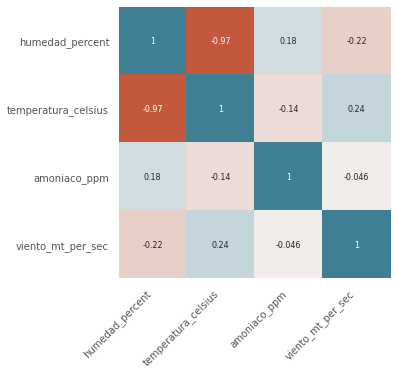

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Correlación:

In [ ]:
datos.head(3)

,tiempo_medicion_timestamp,humedad_percent,temperatura_celsius,amoniaco_ppm,viento_mt_per_sec
0,2014-03-05 12:21:47,65.77,20.0,0.0,0.2
1,2014-03-05 12:31:52,66.93,19.2,3.9,1.0
2,2014-03-05 12:41:52,67.90,19.4,0.5,0.3


**Coeficientes de correlación lineal:**

*Tomado de: https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html:*

"Los coeficientes de correlación lineal son estadísticos que cuantifican la asociación lineal entre dos variables numéricas. Existen diferentes tipos, de entre los que destacan el Pearson, Rho de Spearman y Tau de Kendall. Todos ellos comparten que:

1. Su valor está comprendido en el rango [+1 , -1]. Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta.

2. Se emplean como medida de la fuerza de asociación entre dos variables (tamaño del efecto):

- 0: asociación nula
- 0.1: asociación pequeña
- 0.3: asociación mediana
- 0.5: asociación moderada
- 0.7: asociación alta
- 0.9: asociación muy alta

3. Desde el punto de vista práctico, las principales diferencias entre estos tres coeficientes son:

- La correlación de Pearson funciona bien con variables cuantitativas que tienen una distribución normal o próxima a la normal. Es más sensible a los valores extremos que las otras dos alternativas.

- La correlación de Spearman se emplea con variables cuantitativas (continuas o discretas). En lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden [ranking](https://es.wikipedia.org/wiki/Ranking). Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson.

- La correlación de Kendall es otra alternativa no paramétrica que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones [ranking](https://). Es recomendable cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras."




In [ ]:
import pingouin as pg

In [ ]:
# Cálculo de correlación lineal
# ==============================================================================
pg.corr(x=datos['viento_mt_per_sec'], y=datos['amoniaco_ppm'], method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,63,-0.045533,"[-0.29, 0.2]",0.002073,-0.031191,0.723072,0.167,0.064328


In [ ]:
# Cálculo de correlación lineal
# ==============================================================================
pg.corr(x=datos['viento_mt_per_sec'], y=datos['amoniaco_ppm'], method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,63,-0.189509,"[-0.42, 0.06]",0.035914,0.003777,0.136862,0.321457


In [ ]:
# Cálculo de correlación lineal
# ==============================================================================
pg.corr(x=datos['viento_mt_per_sec'], y=datos['amoniaco_ppm'], method='kendall') #POR LOS DATOS MANEJADOS EN ESTE CASO, ESTE METODO ES EL QUE MAS SE AJUSTA Y ARROJA RESULTADOS SIMILARES A LOS DEL MODELO:

,n,r,CI95%,r2,adj_r2,p-val,power
kendall,63,-0.14975,"[-0.38, 0.1]",0.022425,-0.010161,0.119058,0.21736


#Influencia de las covariables humedad y temperatura:

In [ ]:
# Cálculo de correlación lineal parcial
# ==============================================================================
pg.partial_corr(data=datos, x='viento_mt_per_sec', y='amoniaco_ppm', covar='humedad_percent', method='kendall')

,n,r,CI95%,r2,adj_r2,p-val,power
kendall,63,-0.181772,"[-0.41, 0.07]",0.033041,0.000809,0.035245,0.299458


In [ ]:
# Cálculo de correlación lineal parcial
# ==============================================================================
pg.partial_corr(data=datos, x='viento_mt_per_sec', y='amoniaco_ppm', covar='temperatura_celsius', method='kendall')

,n,r,CI95%,r2,adj_r2,p-val,power
kendall,63,-0.184577,"[-0.41, 0.07]",0.034069,0.001871,0.033177,0.307346


#Conclusiones:

-La correlación lineal es un método estadístico que permite cuantificar la relación lineal existente entre dos variables. Existen varios estadísticos, llamados coeficientes de correlación lineal, desarrollados con el objetivo de medir este tipo de asociación, algunos de los más empleados son Pearson, Spearman y Kendall.

Con frecuencia, los estudios de correlación lineal preceden a análisis más complejos, como la creación de [modelos de regresión](https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html). Primero, se analiza si las variables están correlacionadas y, en caso de estarlo, se procede a generar modelos.

Es importante destacar que, la existencia de correlación entre dos variables, no implica necesariamente causalidad. La asociación observada puede deberse a un tercer factor ([confounder](https://en.wikipedia.org/wiki/Confounding)).

- r^2 se mide en tantos por ciento. Si la varianza residual (Se^2) es cero, el modelo explica el 100% del valor de la variable; si coincide con la varianza de la variable dependiente (Sy^2), el modelo no explica nada y el coeficiente de determinación es del 0%

- Si r < 0, hay correlación negativa : las dos variables se correlacionan en sentido inverso.A valores altos de una de ellas le suelen corresponder valor bajos de la otra y viceversa.Cuánto más próximo a -1 esté el coeficiente de correlación más patente será esta covariación extrema.Si r= -1 hablaremos de correlación negativa perfecta lo que supone una determinación absoluta entre las dos variables ( en sentido inverso): Existe una relación funcional perfecta entre ambas(una relación lineal de pendiente negativa).

- Si r > 0, hay correlación positiva: las dos variables se correlacionan en sentido directo.A valores altos de una le corresponden valores altos de la otra e igualmente con los valores bajos.Cuánto más próximo a +1 esté el coeficiente de correlación más patente será esta covariación.Si r = 1 hablaremos de correlación positiva perfecta lo que supone una determinación absoluta entre las dos variables (en sentido directo):Existe una relación lineal perfecta ( con pendiente positiva).

- Si r = 0, se dice que las variables están incorrelacionadas: no puede establecerse ningún sentido de covariación.

- La correlación entre el viento(x) y la concetración del amoniaco(y) es muy baja (r=-0.14975) y NO tan significativa (pvalue≈12% > 5%). Sin embargo, cuando se estudia su relación bloqueando otras variables como humedad y temperatura, a pesar de que la relación ahora ES significativa (pvalue≈3.5% < 5%, pvalue≈3.3% < 5%), los coeficientes de correlación aumentan en valor absoluto y conservan el sentido negativo (r=-0.181772,r=-0.184577), respectivalente. Entronces, se puede afirmar que la casi nula relación lineal existente entre el viento(x) y la concentración de amoniaco(y) está influenciada por el efecto de otras covariables como la humedad y temperatura.

**Referencias:**

- https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n
- https://www.uv.es/ceaces/base/descriptiva/coefcorre.htm
- https://www.cienciadedatos.net/documentos/24_correlacion_y_regresion_lineal
- https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html
- https://www.odiolaestadistica.com/estadistica-python/covarianza/#:~:text=En%20python%2C%20utilizamos%20el%20m%C3%A9todo,las%20variables%20que%20nos%20interesan


# Información de sesión:

In [ ]:
!pip install sinfo
from sinfo import sinfo
sinfo()

     |████████████████████████████████| 71kB 3.1MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.1-cp37-none-any.whl size=7012 sha256=9d146eeb03df209071bbda43dd596b89b598e39f9b75c678d7b39aa0e6f73927
  Stored in directory: /root/.cache/pip/wheels/11/f0/23/347d6d8e59787c2bc272162d18223dc3b45bd6dc40aceee6af
Successfully built sinfo
-----
branca      0.4.2
bs4         4.6.3
folium      0.8.3
geopandas   0.9.0
google      NA
graphviz    0.10.1
matplotlib  3.2.2
numpy       1.19.5
pandas      1.1.5
pingouin    0.3.10
pydotplus   NA
requests    2.23.0
scipy       1.4.1
seaborn     0.11.1
sinfo       0.3.1
sklearn     0.22.2.post1
statsmodels 0.10.2
sympy       1.7.1
wordcloud   1.5.0
-----
IPython             5.5.0
jupyter_client      5.3.5
jupyter_core        4.7.1
notebook            5.3.1
-----
Python 3.7.10 (default, Feb 20 2021, 21:17:23) [GCC 7.5.0]
Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
2 logical CPU cores, x86_64
-----
Session information updated at 2021-04-14 01:55


**¡Terminado!**


